## 1. Installing and Importing all the required modules/packages.

For Geographical plotting.

In [ ]:
!pip install chart_studio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.4/64.4 kB 1.8 MB/s eta 0:00:00


In [ ]:
# To unzip the downloaded dataset zip file.
import zipfile

# To detect the character encoding.
import chardet

import numpy as np
import pandas as pd

# For visualization.
import matplotlib.pyplot as plt
import seaborn as sns
from plotly.offline import init_notebook_mode, iplot, plot
import plotly.io as pio
import plotly.express as px
import cufflinks as cf
import chart_studio.plotly as py
import plotly.graph_objects as go

import math
import datetime

# For Machine Learning.
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.metrics import confusion_matrix, classification_report

## 2. Visuals-related settings.

In [ ]:
%matplotlib inline

sns.set_style('whitegrid')

init_notebook_mode(connected = True)
cf.go_offline()
pio.renderers.default = 'colab'

## 3. Downloading the dataset.

### 3.1. cURL request.

-L follows redirects and -o specifies the output to a file.

In [ ]:
!curl -L -o ecommerce-data.zip\
  https://www.kaggle.com/api/v1/datasets/download/carrie1/ecommerce-data

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100 7371k  100 7371k    0     0  7960k      0 --:--:-- --:--:-- --:--:-- 7960k


### 3.2. Unzipping.

In [ ]:
# Unzipping the downloaded dataset zip file.

with zipfile.ZipFile('ecommerce-data.zip', 'r') as zip_file:
  zip_file.extractall()

## 4. EDA and Feature Engineering.

### 4.1. Loading the dataset.

In [ ]:
# dataset = pd.read_csv('data.csv')
# dataset

In [ ]:
# Detecting the file encoding.

# with open('data.csv', 'rb') as file:
#   result = chardet.detect(file.read())
#   print(result)

In [ ]:
dataset = pd.read_csv('data.csv', encoding = 'ISO-8859-1')
df = dataset.copy()
df

InvoiceNo StockCode                          Description  Quantity  \
0         536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1         536365     71053                  WHITE METAL LANTERN         6   
2         536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3         536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4         536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
...          ...       ...                                  ...       ...   
541904    581587     22613          PACK OF 20 SPACEBOY NAPKINS        12   
541905    581587     22899         CHILDREN'S APRON DOLLY GIRL          6   
541906    581587     23254        CHILDRENS CUTLERY DOLLY GIRL          4   
541907    581587     23255      CHILDRENS CUTLERY CIRCUS PARADE         4   
541908    581587     22138        BAKING SET 9 PIECE RETROSPOT          3   

            InvoiceDate  UnitPrice  CustomerID         Country  
0        12/1/2010 8:26       2.55     17850.0  United Kingdom  
1        12/1/2010 8:26       3.39     17850.0  United Kingdom  
2        12/1/2010 8:26       2.75     17850.0  United Kingdom  
3        12/1/2010 8:26       3.39     17850.0  United Kingdom  
4        12/1/2010 8:26       3.39     17850.0  United Kingdom  
...                 ...        ...         ...             ...  
541904  12/9/2011 12:50       0.85     12680.0          France  
541905  12/9/2011 12:50       2.10     12680.0          France  
541906  12/9/2011 12:50       4.15     12680.0          France  
541907  12/9/2011 12:50       4.15     12680.0          France  
541908  12/9/2011 12:50       4.95     12680.0          France  

[541909 rows x 8 columns]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


### 4.2. Data cleanup.

#### StockCode and Description.

In [ ]:
# Unique Descriptions/Names per StockCode/Product ID.

df.groupby('StockCode')['Description'].nunique().describe()

count    4070.000000
mean        1.177396
std         0.574274
min         0.000000
25%         1.000000
50%         1.000000
75%         1.000000
max         8.000000
Name: Description, dtype: float64

In [ ]:
# Product IDs/StockCodes with no or multiple Description(s).
df.groupby('StockCode')['Description'].nunique()[df.groupby('StockCode')['Description'].nunique() != 1]

StockCode
10080           2
10123G          0
10133           2
10134           0
15058A          2
               ..
DCGS0069        2
DCGS0071        0
DCGS0072        0
DCGS0074        0
gift_0001_20    2
Name: Description, Length: 762, dtype: int64

In [ ]:
# Order/Customer-level drop scenario.

df[df['StockCode'].isin(df.groupby('StockCode')['Description'].nunique()[df.groupby('StockCode')['Description'].nunique() != 1].index)]['InvoiceNo'].\
nunique(),\
df[df['StockCode'].isin(df.groupby('StockCode')['Description'].nunique()[df.groupby('StockCode')['Description'].nunique() != 1].index)]['CustomerID'].\
nunique()

(19534, 4098)

In [ ]:
df['InvoiceNo'].nunique()

25900

In [ ]:
df.drop(df[df['StockCode'].isin(df.groupby('StockCode')['Description'].nunique()[df.groupby('StockCode')['Description'].nunique() != 1].index)].index,\
        inplace = True)
df.reset_index(drop = True, inplace = True)
df

InvoiceNo StockCode                          Description  Quantity  \
0         536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
1         536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
2         536365     22752         SET 7 BABUSHKA NESTING BOXES         2   
3         536365     21730    GLASS STAR FROSTED T-LIGHT HOLDER         6   
4         536366     22633               HAND WARMER UNION JACK         6   
...          ...       ...                                  ...       ...   
428327    581587     22629                  SPACEBOY LUNCH BOX         12   
428328    581587     22613          PACK OF 20 SPACEBOY NAPKINS        12   
428329    581587     22899         CHILDREN'S APRON DOLLY GIRL          6   
428330    581587     23255      CHILDRENS CUTLERY CIRCUS PARADE         4   
428331    581587     22138        BAKING SET 9 PIECE RETROSPOT          3   

            InvoiceDate  UnitPrice  CustomerID         Country  
0        12/1/2010 8:26       3.39     17850.0  United Kingdom  
1        12/1/2010 8:26       3.39     17850.0  United Kingdom  
2        12/1/2010 8:26       7.65     17850.0  United Kingdom  
3        12/1/2010 8:26       4.25     17850.0  United Kingdom  
4        12/1/2010 8:28       1.85     17850.0  United Kingdom  
...                 ...        ...         ...             ...  
428327  12/9/2011 12:50       1.95     12680.0          France  
428328  12/9/2011 12:50       0.85     12680.0          France  
428329  12/9/2011 12:50       2.10     12680.0          France  
428330  12/9/2011 12:50       4.15     12680.0          France  
428331  12/9/2011 12:50       4.95     12680.0          France  

[428332 rows x 8 columns]

In [ ]:
df.groupby('StockCode')['Description'].nunique().describe()

count    3308.0
mean        1.0
std         0.0
min         1.0
25%         1.0
50%         1.0
75%         1.0
max         1.0
Name: Description, dtype: float64

In [ ]:
# Some Descriptions/Names have more than one SKUs/IDs.

df[~df['Description'].isna()].groupby('Description')['StockCode'].nunique()[df[~df['Description'].isna()].groupby('Description')['StockCode'].nunique() > 1]

Description
3 WHITE CHOC MORRIS BOXED CANDLES    2
3D DOG PICTURE PLAYING CARDS         2
3D SHEET OF CAT STICKERS             2
3D SHEET OF DOG STICKERS             2
4 SKY BLUE DINNER CANDLES            2
                                    ..
WOVEN BUBBLE GUM CUSHION COVER       2
WOVEN CANDY CUSHION COVER            2
WOVEN ROSE GARDEN CUSHION COVER      2
ebay                                 3
thrown away                          3
Name: StockCode, Length: 92, dtype: int64

In [ ]:
df[df['Description'] == '3 WHITE CHOC MORRIS BOXED CANDLES']['StockCode'].unique(),\
df[df['Description'] == 'WOVEN BUBBLE GUM CUSHION COVER']['StockCode'].unique()

(array(['85034B', '85034b'], dtype=object),
 array(['46776A', '46776a'], dtype=object))

In [ ]:
df['StockCode'] = df['StockCode'].apply(lambda product_id: product_id.upper())
df

InvoiceNo StockCode                          Description  Quantity  \
0         536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
1         536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
2         536365     22752         SET 7 BABUSHKA NESTING BOXES         2   
3         536365     21730    GLASS STAR FROSTED T-LIGHT HOLDER         6   
4         536366     22633               HAND WARMER UNION JACK         6   
...          ...       ...                                  ...       ...   
428327    581587     22629                  SPACEBOY LUNCH BOX         12   
428328    581587     22613          PACK OF 20 SPACEBOY NAPKINS        12   
428329    581587     22899         CHILDREN'S APRON DOLLY GIRL          6   
428330    581587     23255      CHILDRENS CUTLERY CIRCUS PARADE         4   
428331    581587     22138        BAKING SET 9 PIECE RETROSPOT          3   

            InvoiceDate  UnitPrice  CustomerID         Country  
0        12/1/2010 8:26       3.39     17850.0  United Kingdom  
1        12/1/2010 8:26       3.39     17850.0  United Kingdom  
2        12/1/2010 8:26       7.65     17850.0  United Kingdom  
3        12/1/2010 8:26       4.25     17850.0  United Kingdom  
4        12/1/2010 8:28       1.85     17850.0  United Kingdom  
...                 ...        ...         ...             ...  
428327  12/9/2011 12:50       1.95     12680.0          France  
428328  12/9/2011 12:50       0.85     12680.0          France  
428329  12/9/2011 12:50       2.10     12680.0          France  
428330  12/9/2011 12:50       4.15     12680.0          France  
428331  12/9/2011 12:50       4.95     12680.0          France  

[428332 rows x 8 columns]

In [ ]:
df[~df['Description'].isna()].groupby('Description')['StockCode'].nunique()[df[~df['Description'].isna()].groupby('Description')['StockCode'].nunique() > 1]

Description
COLUMBIAN CANDLE RECTANGLE         2
COLUMBIAN CANDLE ROUND             2
EAU DE NILE JEWELLED PHOTOFRAME    2
FRENCH LATTICE CUSHION COVER       2
FROSTED WHITE BASE                 2
METAL SIGN,CUPCAKE SINGLE HOOK     3
PINK FAIRY CAKE CUSHION COVER      2
PINK FLOCK GLASS CANDLEHOLDER      2
PINK FLOWERS RABBIT EASTER         2
RETRO PLASTIC 70'S TRAY            2
RETRO PLASTIC DAISY TRAY           2
RETRO PLASTIC POLKA TRAY           2
ROUND BLUE CLOCK WITH SUCKER       2
Unsaleable, destroyed.             6
ebay                               3
thrown away                        3
Name: StockCode, dtype: int64

In [ ]:
df[df['Description'] == 'COLUMBIAN CANDLE RECTANGLE']['StockCode'].unique(),\
df[df['Description'] == 'ROUND BLUE CLOCK WITH SUCKER']['StockCode'].unique()

(array(['72133', '72131'], dtype=object),
 array(['81952B', '81953B'], dtype=object))

In [ ]:
df.drop(df[df['StockCode'].isin(df[df['Description'].isin(df[~df['Description'].isna()].groupby('Description')['StockCode'].nunique()[df[~df['Description'].isna()].groupby('Description')['StockCode'].nunique() > 1].index)]['StockCode'].unique())].index,\
        inplace = True)
df.reset_index(drop = True, inplace = True)
df

InvoiceNo StockCode                          Description  Quantity  \
0         536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
1         536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
2         536365     22752         SET 7 BABUSHKA NESTING BOXES         2   
3         536365     21730    GLASS STAR FROSTED T-LIGHT HOLDER         6   
4         536366     22633               HAND WARMER UNION JACK         6   
...          ...       ...                                  ...       ...   
427537    581587     22629                  SPACEBOY LUNCH BOX         12   
427538    581587     22613          PACK OF 20 SPACEBOY NAPKINS        12   
427539    581587     22899         CHILDREN'S APRON DOLLY GIRL          6   
427540    581587     23255      CHILDRENS CUTLERY CIRCUS PARADE         4   
427541    581587     22138        BAKING SET 9 PIECE RETROSPOT          3   

            InvoiceDate  UnitPrice  CustomerID         Country  
0        12/1/2010 8:26       3.39     17850.0  United Kingdom  
1        12/1/2010 8:26       3.39     17850.0  United Kingdom  
2        12/1/2010 8:26       7.65     17850.0  United Kingdom  
3        12/1/2010 8:26       4.25     17850.0  United Kingdom  
4        12/1/2010 8:28       1.85     17850.0  United Kingdom  
...                 ...        ...         ...             ...  
427537  12/9/2011 12:50       1.95     12680.0          France  
427538  12/9/2011 12:50       0.85     12680.0          France  
427539  12/9/2011 12:50       2.10     12680.0          France  
427540  12/9/2011 12:50       4.15     12680.0          France  
427541  12/9/2011 12:50       4.95     12680.0          France  

[427542 rows x 8 columns]

In [ ]:
# 1 to 1 StockCode and Description mapping.

df.groupby('StockCode')['Description'].nunique().describe()

count    3191.0
mean        1.0
std         0.0
min         1.0
25%         1.0
50%         1.0
75%         1.0
max         1.0
Name: Description, dtype: float64

In [ ]:
df[~df['Description'].isna()].groupby('Description')['StockCode'].nunique().describe()

count    3191.0
mean        1.0
std         0.0
min         1.0
25%         1.0
50%         1.0
75%         1.0
max         1.0
Name: StockCode, dtype: float64

In [ ]:
df.isna().sum()

InvoiceNo           0
StockCode           0
Description      1026
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     110173
Country             0
dtype: int64

In [ ]:
products = df[['StockCode', 'Description']].dropna().drop_duplicates().set_index('StockCode').copy()
products

Description
StockCode                                     
84029G     KNITTED UNION FLAG HOT WATER BOTTLE
84029E          RED WOOLLY HOTTIE WHITE HEART.
22752             SET 7 BABUSHKA NESTING BOXES
21730        GLASS STAR FROSTED T-LIGHT HOLDER
22633                   HAND WARMER UNION JACK
...                                        ...
23609           SET 10 CARDS SNOWY ROBIN 17099
23617      SET 10 CARDS SWIRLY XMAS TREE 17104
90214U               LETTER "U" BLING KEY RING
47591B                SCOTTIES CHILDRENS APRON
23843              PAPER CRAFT , LITTLE BIRDIE

[3191 rows x 1 columns]

In [ ]:
df['Description'] = df['StockCode'].apply(lambda product_id: products.loc[product_id, 'Description'])
df

InvoiceNo StockCode                          Description  Quantity  \
0         536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
1         536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
2         536365     22752         SET 7 BABUSHKA NESTING BOXES         2   
3         536365     21730    GLASS STAR FROSTED T-LIGHT HOLDER         6   
4         536366     22633               HAND WARMER UNION JACK         6   
...          ...       ...                                  ...       ...   
427537    581587     22629                  SPACEBOY LUNCH BOX         12   
427538    581587     22613          PACK OF 20 SPACEBOY NAPKINS        12   
427539    581587     22899         CHILDREN'S APRON DOLLY GIRL          6   
427540    581587     23255      CHILDRENS CUTLERY CIRCUS PARADE         4   
427541    581587     22138        BAKING SET 9 PIECE RETROSPOT          3   

            InvoiceDate  UnitPrice  CustomerID         Country  
0        12/1/2010 8:26       3.39     17850.0  United Kingdom  
1        12/1/2010 8:26       3.39     17850.0  United Kingdom  
2        12/1/2010 8:26       7.65     17850.0  United Kingdom  
3        12/1/2010 8:26       4.25     17850.0  United Kingdom  
4        12/1/2010 8:28       1.85     17850.0  United Kingdom  
...                 ...        ...         ...             ...  
427537  12/9/2011 12:50       1.95     12680.0          France  
427538  12/9/2011 12:50       0.85     12680.0          France  
427539  12/9/2011 12:50       2.10     12680.0          France  
427540  12/9/2011 12:50       4.15     12680.0          France  
427541  12/9/2011 12:50       4.95     12680.0          France  

[427542 rows x 8 columns]

In [ ]:
df['Description'].isna().sum()

np.int64(0)

#### InvoiceDate.

In [ ]:
df['InvoiceDate'].dtype

dtype('O')

In [ ]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df

InvoiceNo StockCode                          Description  Quantity  \
0         536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
1         536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
2         536365     22752         SET 7 BABUSHKA NESTING BOXES         2   
3         536365     21730    GLASS STAR FROSTED T-LIGHT HOLDER         6   
4         536366     22633               HAND WARMER UNION JACK         6   
...          ...       ...                                  ...       ...   
427537    581587     22629                  SPACEBOY LUNCH BOX         12   
427538    581587     22613          PACK OF 20 SPACEBOY NAPKINS        12   
427539    581587     22899         CHILDREN'S APRON DOLLY GIRL          6   
427540    581587     23255      CHILDRENS CUTLERY CIRCUS PARADE         4   
427541    581587     22138        BAKING SET 9 PIECE RETROSPOT          3   

               InvoiceDate  UnitPrice  CustomerID         Country  
0      2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
1      2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
2      2010-12-01 08:26:00       7.65     17850.0  United Kingdom  
3      2010-12-01 08:26:00       4.25     17850.0  United Kingdom  
4      2010-12-01 08:28:00       1.85     17850.0  United Kingdom  
...                    ...        ...         ...             ...  
427537 2011-12-09 12:50:00       1.95     12680.0          France  
427538 2011-12-09 12:50:00       0.85     12680.0          France  
427539 2011-12-09 12:50:00       2.10     12680.0          France  
427540 2011-12-09 12:50:00       4.15     12680.0          France  
427541 2011-12-09 12:50:00       4.95     12680.0          France  

[427542 rows x 8 columns]

In [ ]:
# Unique Timestamps/InvoiceDate per Order/InvoiceNo.
# Some orders have two timestamps.

df.groupby('InvoiceNo')['InvoiceDate'].nunique().describe()

count    23678.000000
mean         1.001774
std          0.042080
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max          2.000000
Name: InvoiceDate, dtype: float64

In [ ]:
df['InvoiceDate'].max(), df['InvoiceDate'].min()

(Timestamp('2011-12-09 12:50:00'), Timestamp('2010-12-01 08:26:00'))

In [ ]:
df['InvoiceDate'].max() - df['InvoiceDate'].min()

Timedelta('373 days 04:24:00')

In [ ]:
(df['InvoiceDate'].max() - df['InvoiceDate'].min()).days, (df['InvoiceDate'].max() - df['InvoiceDate'].min()).seconds,\
 (df['InvoiceDate'].max() - df['InvoiceDate'].min()).total_seconds()

(373, 15840, 32243040.0)

In [ ]:
# Difference between the MAX and MIN InvoiceDate per order.

df.groupby('InvoiceNo').agg(MaxMinusMinInvoiceDate = ('InvoiceDate', lambda s: (s.max() - s.min()).total_seconds())).describe()

MaxMinusMinInvoiceDate
count            23678.000000
mean                 0.106428
std                  2.524800
min                  0.000000
25%                  0.000000
50%                  0.000000
75%                  0.000000
max                 60.000000

In [ ]:
orders = df.groupby('InvoiceNo').agg(InvoiceDate = ('InvoiceDate', lambda s: s.max())).copy()
orders

InvoiceDate
InvoiceNo                    
536365    2010-12-01 08:26:00
536366    2010-12-01 08:28:00
536367    2010-12-01 08:34:00
536368    2010-12-01 08:34:00
536369    2010-12-01 08:35:00
...                       ...
C581468   2011-12-08 19:26:00
C581484   2011-12-09 09:27:00
C581490   2011-12-09 09:57:00
C581499   2011-12-09 10:28:00
C581569   2011-12-09 11:58:00

[23678 rows x 1 columns]

#### Invalid entries & Outliers.

In [ ]:
df[['Quantity', 'UnitPrice']].describe()

Quantity      UnitPrice
count  427542.000000  427542.000000
mean        9.583494       4.849592
std       242.288282     108.891958
min    -80995.000000  -11062.060000
25%         1.000000       1.250000
50%         3.000000       2.080000
75%        10.000000       4.130000
max     80995.000000   38970.000000

In [ ]:
# Invalid entries.
# Negative unit price.

df[df['UnitPrice'] < 0]

InvoiceNo StockCode      Description  Quantity         InvoiceDate  \
237824   A563186         B  Adjust bad debt         1 2011-08-12 14:51:00   
237825   A563187         B  Adjust bad debt         1 2011-08-12 14:52:00   

        UnitPrice  CustomerID         Country  
237824  -11062.06         NaN  United Kingdom  
237825  -11062.06         NaN  United Kingdom

In [ ]:
df.drop(df[df['UnitPrice'] < 0].index, inplace = True)
df.reset_index(drop = True, inplace = True)
df

InvoiceNo StockCode                          Description  Quantity  \
0         536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
1         536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
2         536365     22752         SET 7 BABUSHKA NESTING BOXES         2   
3         536365     21730    GLASS STAR FROSTED T-LIGHT HOLDER         6   
4         536366     22633               HAND WARMER UNION JACK         6   
...          ...       ...                                  ...       ...   
427535    581587     22629                  SPACEBOY LUNCH BOX         12   
427536    581587     22613          PACK OF 20 SPACEBOY NAPKINS        12   
427537    581587     22899         CHILDREN'S APRON DOLLY GIRL          6   
427538    581587     23255      CHILDRENS CUTLERY CIRCUS PARADE         4   
427539    581587     22138        BAKING SET 9 PIECE RETROSPOT          3   

               InvoiceDate  UnitPrice  CustomerID         Country  
0      2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
1      2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
2      2010-12-01 08:26:00       7.65     17850.0  United Kingdom  
3      2010-12-01 08:26:00       4.25     17850.0  United Kingdom  
4      2010-12-01 08:28:00       1.85     17850.0  United Kingdom  
...                    ...        ...         ...             ...  
427535 2011-12-09 12:50:00       1.95     12680.0          France  
427536 2011-12-09 12:50:00       0.85     12680.0          France  
427537 2011-12-09 12:50:00       2.10     12680.0          France  
427538 2011-12-09 12:50:00       4.15     12680.0          France  
427539 2011-12-09 12:50:00       4.95     12680.0          France  

[427540 rows x 8 columns]

In [ ]:
df[['Quantity', 'UnitPrice']].describe()

Quantity      UnitPrice
count  427540.000000  427540.000000
mean        9.583534       4.901363
std       242.288848     106.228876
min    -80995.000000       0.000000
25%         1.000000       1.250000
50%         3.000000       2.080000
75%        10.000000       4.130000
max     80995.000000   38970.000000

In [ ]:
df['Quantity'].plot(kind = 'box')

<Axes: >

In [ ]:
# 98th percentile of product quantities.

df['Quantity'].quantile(0.98)

np.float64(60.0)

In [ ]:
print(f"% data to drop: {((len(df[(df['Quantity'] < -60) | (df['Quantity'] > 60)]) / len(df)) * 100):.2f}%")

% data to drop: 2.06%


In [ ]:
df.drop(df[(df['Quantity'] < -60) | (df['Quantity'] > 60)].index, inplace = True)
df.reset_index(drop = True, inplace = True)
df

InvoiceNo StockCode                          Description  Quantity  \
0         536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
1         536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
2         536365     22752         SET 7 BABUSHKA NESTING BOXES         2   
3         536365     21730    GLASS STAR FROSTED T-LIGHT HOLDER         6   
4         536366     22633               HAND WARMER UNION JACK         6   
...          ...       ...                                  ...       ...   
418714    581587     22629                  SPACEBOY LUNCH BOX         12   
418715    581587     22613          PACK OF 20 SPACEBOY NAPKINS        12   
418716    581587     22899         CHILDREN'S APRON DOLLY GIRL          6   
418717    581587     23255      CHILDRENS CUTLERY CIRCUS PARADE         4   
418718    581587     22138        BAKING SET 9 PIECE RETROSPOT          3   

               InvoiceDate  UnitPrice  CustomerID         Country  
0      2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
1      2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
2      2010-12-01 08:26:00       7.65     17850.0  United Kingdom  
3      2010-12-01 08:26:00       4.25     17850.0  United Kingdom  
4      2010-12-01 08:28:00       1.85     17850.0  United Kingdom  
...                    ...        ...         ...             ...  
418714 2011-12-09 12:50:00       1.95     12680.0          France  
418715 2011-12-09 12:50:00       0.85     12680.0          France  
418716 2011-12-09 12:50:00       2.10     12680.0          France  
418717 2011-12-09 12:50:00       4.15     12680.0          France  
418718 2011-12-09 12:50:00       4.95     12680.0          France  

[418719 rows x 8 columns]

In [ ]:
figure = plt.figure(figsize = (8, 12))
figure.suptitle('Quantity distribution')
figure.add_subplot(3, 1, 1)
sns.kdeplot(df['Quantity'])
figure.add_subplot(3, 1, 2)
sns.histplot(df['Quantity'], bins = 20)
figure.add_subplot(3, 1, 3)
sns.boxplot(x = df['Quantity'])

<Axes: xlabel='Quantity'>

<Axes: >

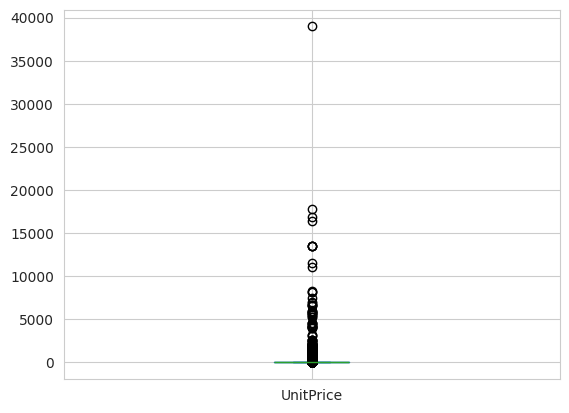

In [ ]:
df['UnitPrice'].plot(kind = 'box')

In [ ]:
# Top 100 unit price.

df['UnitPrice'].sort_values(ascending = False).head(100).values

array([38970.  , 17836.46, 16888.02, 16453.71, 13541.33, 13541.33,
       13541.33, 13474.79, 11586.5 , 11062.06,  8286.22,  8142.75,
        8142.75,  7427.97,  7006.83,  6930.  ,  6721.37,  6706.71,
        6662.51,  6497.47,  5942.57,  5942.57,  5877.18,  5876.4 ,
        5791.18,  5693.05,  5575.28,  5522.14,  5519.25,  5258.77,
        5225.03,  4575.64,  4534.24,  4527.65,  4505.17,  4383.62,
        4287.63,  4287.63,  4161.06,  4161.06,  4161.06,  3949.32,
        3949.32,  3155.95,  3155.95,  3060.6 ,  2653.95,  2653.95,
        2583.76,  2583.76,  2500.  ,  2382.92,  2382.92,  2275.54,
        2196.67,  2185.04,  2118.74,  2118.74,  2114.  ,  2053.07,
        2053.07,  2033.1 ,  2028.25,  2019.05,  1917.  ,  1917.  ,
        1867.86,  1867.86,  1861.46,  1829.84,  1715.85,  1714.17,
        1687.17,  1687.17,  1687.17,  1687.17,  1683.75,  1599.26,
        1592.49,  1592.49,  1569.04,  1563.  ,  1556.08,  1526.76,
        1500.36,  1486.12,  1483.21,  1435.79,  1325.  ,  1298

In [ ]:
# 98th percentile of unit price.

df['UnitPrice'].quantile(0.98)

np.float64(14.95)

In [ ]:
print(f"% data to drop: {((len(df[df['UnitPrice'] > 15]) / len(df)) * 100):.2f}%")

% data to drop: 1.78%


In [ ]:
df.drop(df[df['UnitPrice'] > 15].index, inplace = True)
df.reset_index(drop = True, inplace = True)
df

InvoiceNo StockCode                          Description  Quantity  \
0         536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
1         536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
2         536365     22752         SET 7 BABUSHKA NESTING BOXES         2   
3         536365     21730    GLASS STAR FROSTED T-LIGHT HOLDER         6   
4         536366     22633               HAND WARMER UNION JACK         6   
...          ...       ...                                  ...       ...   
411254    581587     22629                  SPACEBOY LUNCH BOX         12   
411255    581587     22613          PACK OF 20 SPACEBOY NAPKINS        12   
411256    581587     22899         CHILDREN'S APRON DOLLY GIRL          6   
411257    581587     23255      CHILDRENS CUTLERY CIRCUS PARADE         4   
411258    581587     22138        BAKING SET 9 PIECE RETROSPOT          3   

               InvoiceDate  UnitPrice  CustomerID         Country  
0      2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
1      2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
2      2010-12-01 08:26:00       7.65     17850.0  United Kingdom  
3      2010-12-01 08:26:00       4.25     17850.0  United Kingdom  
4      2010-12-01 08:28:00       1.85     17850.0  United Kingdom  
...                    ...        ...         ...             ...  
411254 2011-12-09 12:50:00       1.95     12680.0          France  
411255 2011-12-09 12:50:00       0.85     12680.0          France  
411256 2011-12-09 12:50:00       2.10     12680.0          France  
411257 2011-12-09 12:50:00       4.15     12680.0          France  
411258 2011-12-09 12:50:00       4.95     12680.0          France  

[411259 rows x 8 columns]

<Axes: xlabel='UnitPrice'>

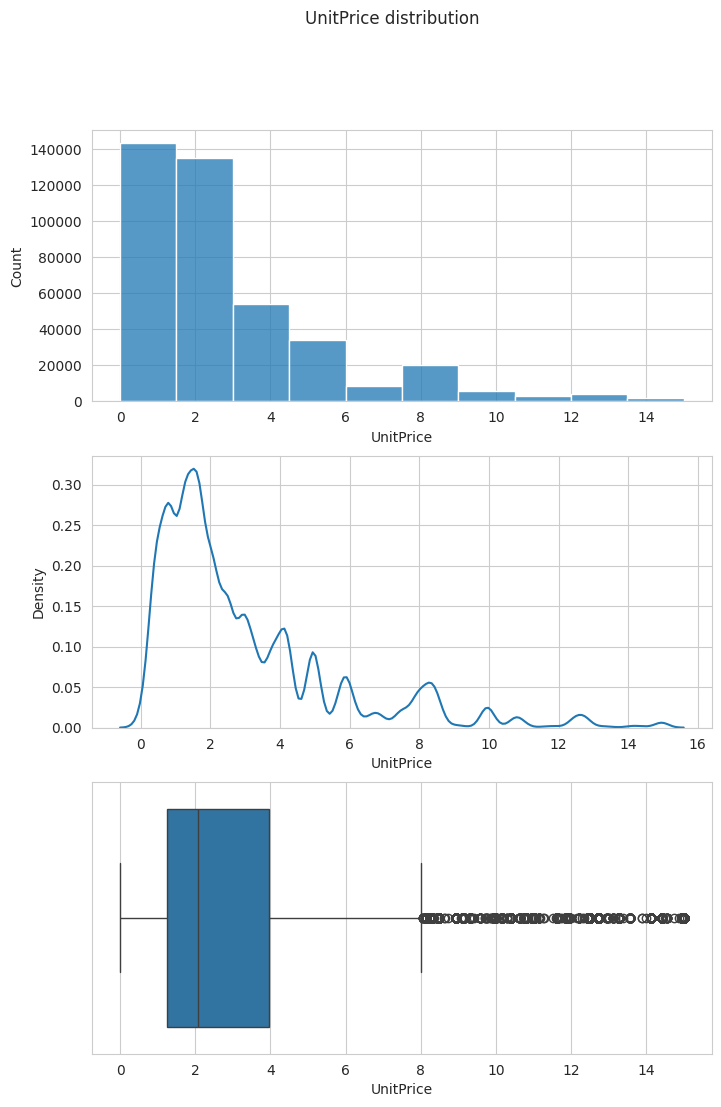

In [ ]:
figure = plt.figure(figsize = (8, 12))
figure.suptitle('UnitPrice distribution')
figure.add_subplot(3, 1, 1)
sns.histplot(df['UnitPrice'], bins = 10)
figure.add_subplot(3, 1, 2)
sns.kdeplot(df['UnitPrice'])
figure.add_subplot(3, 1, 3)
sns.boxplot(x = df['UnitPrice'])

In [ ]:
df.isna().sum()

InvoiceNo           0
StockCode           0
Description         0
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     105067
Country             0
dtype: int64

### 4.3. Product Categories and Sub-Categories (Gen AI).

In [ ]:
df['Description'].drop_duplicates()

0         KNITTED UNION FLAG HOT WATER BOTTLE
1              RED WOOLLY HOTTIE WHITE HEART.
2                SET 7 BABUSHKA NESTING BOXES
3           GLASS STAR FROSTED T-LIGHT HOLDER
4                      HAND WARMER UNION JACK
                         ...                 
387926    SET 10 CARDS SWIRLY XMAS TREE 17104
394368               FAUX FUR CHOCOLATE THROW
399342              LETTER "U" BLING KEY RING
401838              CLASSICAL ROSE TABLE LAMP
407482               SCOTTIES CHILDRENS APRON
Name: Description, Length: 3157, dtype: object

In [ ]:
# df['Description'].drop_duplicates().to_csv('unique_product_descriptions.csv', index = False)

In [ ]:
product_details = pd.read_excel('/content/drive/MyDrive/DATA SCIENCE/Domain change Interview/product_details.xlsx')
product_details

Description      Category   Sub-Category
0             SET/4 BADGES BALLOON GIRL   Accessories         Badges
1                  SET/4 BADGES BEETLES   Accessories         Badges
2                    SET/4 SKULL BADGES   Accessories         Badges
3                     SET/4 BADGES DOGS   Accessories  Badges & Pins
4          AMBER GLASS TASSLE BAG CHARM   Accessories     Bag Charms
...                                 ...           ...            ...
3244      Dr. Jam's Arouzer Stress Ball  Toys & Games   Stress Balls
3245                  SILVER TEDDY BEAR  Toys & Games    Teddy Bears
3246        4 TRADITIONAL SPINNING TOPS  Toys & Games   Toys & Games
3247            BAG 500g SWIRLY MARBLES  Toys & Games   Toys & Games
3248  DINOSAUR HEIGHT CHART STICKER SET  Toys & Games  Wall Stickers

[3249 rows x 3 columns]

In [ ]:
# Removing extra white spaces in the Description.

df['Description'] = df['Description'].apply(lambda descr: ' '.join([word.strip() for word in descr.strip().split()]))
df

InvoiceNo StockCode                          Description  Quantity  \
0         536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
1         536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
2         536365     22752         SET 7 BABUSHKA NESTING BOXES         2   
3         536365     21730    GLASS STAR FROSTED T-LIGHT HOLDER         6   
4         536366     22633               HAND WARMER UNION JACK         6   
...          ...       ...                                  ...       ...   
411254    581587     22629                   SPACEBOY LUNCH BOX        12   
411255    581587     22613          PACK OF 20 SPACEBOY NAPKINS        12   
411256    581587     22899          CHILDREN'S APRON DOLLY GIRL         6   
411257    581587     23255      CHILDRENS CUTLERY CIRCUS PARADE         4   
411258    581587     22138         BAKING SET 9 PIECE RETROSPOT         3   

               InvoiceDate  UnitPrice  CustomerID         Country  
0      2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
1      2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
2      2010-12-01 08:26:00       7.65     17850.0  United Kingdom  
3      2010-12-01 08:26:00       4.25     17850.0  United Kingdom  
4      2010-12-01 08:28:00       1.85     17850.0  United Kingdom  
...                    ...        ...         ...             ...  
411254 2011-12-09 12:50:00       1.95     12680.0          France  
411255 2011-12-09 12:50:00       0.85     12680.0          France  
411256 2011-12-09 12:50:00       2.10     12680.0          France  
411257 2011-12-09 12:50:00       4.15     12680.0          France  
411258 2011-12-09 12:50:00       4.95     12680.0          France  

[411259 rows x 8 columns]

In [ ]:
# Rectifying a few spelling mistakes.

correct_product_names = {
    'LIGHT GARLAND BUTTERFILES PINK': 'LIGHT GARLAND BUTTERFLIES PINK',
    'BLUE ROSE PATCH PURSE PINK BUTTERFL': 'BLUE ROSE PATCH PURSE PINK BUTTERFLY',
    'MIDNIGHT BLUE COPPER FLOWER NECKLAC': 'MIDNIGHT BLUE COPPER FLOWER NECKLACE',
    'AMETHYST CHUNKY BEAD BRACELET W STR': 'AMETHYST CHUNKY BEAD BRACELET W STRAP',
    'SET/3 RABBITS FLOWER SKIPPPING ROPE': 'SET/3 RABBITS FLOWER SKIPPING ROPE',
    'UTILTY CABINET WITH HOOKS': 'UTILITY CABINET WITH HOOKS',
    'PEARL AND CHERRY QUARTZ BRACLET': 'PEARL AND CHERRY QUARTZ BRACELET',
    'WHITE VINT ART DECO CRYSTAL NECKLAC': 'WHITE VINT ART DECO CRYSTAL NECKLACE',
    'PURPLE FOXGLOVE ARTIIFCIAL FLOWER': 'PURPLE FOXGLOVE ARTIFICIAL FLOWER',
    'RASPBERRY ANT COPPER FLOWER NECKLAC': 'RASPBERRY ANT COPPER FLOWER NECKLACE'
}

df['Description'] = df['Description'].apply(lambda descr: correct_product_names[descr] if descr in correct_product_names else descr)
df

InvoiceNo StockCode                          Description  Quantity  \
0         536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
1         536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
2         536365     22752         SET 7 BABUSHKA NESTING BOXES         2   
3         536365     21730    GLASS STAR FROSTED T-LIGHT HOLDER         6   
4         536366     22633               HAND WARMER UNION JACK         6   
...          ...       ...                                  ...       ...   
411254    581587     22629                   SPACEBOY LUNCH BOX        12   
411255    581587     22613          PACK OF 20 SPACEBOY NAPKINS        12   
411256    581587     22899          CHILDREN'S APRON DOLLY GIRL         6   
411257    581587     23255      CHILDRENS CUTLERY CIRCUS PARADE         4   
411258    581587     22138         BAKING SET 9 PIECE RETROSPOT         3   

               InvoiceDate  UnitPrice  CustomerID         Country  
0      2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
1      2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
2      2010-12-01 08:26:00       7.65     17850.0  United Kingdom  
3      2010-12-01 08:26:00       4.25     17850.0  United Kingdom  
4      2010-12-01 08:28:00       1.85     17850.0  United Kingdom  
...                    ...        ...         ...             ...  
411254 2011-12-09 12:50:00       1.95     12680.0          France  
411255 2011-12-09 12:50:00       0.85     12680.0          France  
411256 2011-12-09 12:50:00       2.10     12680.0          France  
411257 2011-12-09 12:50:00       4.15     12680.0          France  
411258 2011-12-09 12:50:00       4.95     12680.0          France  

[411259 rows x 8 columns]

In [ ]:
df = pd.merge(df, product_details, on = 'Description', how = 'left')
df

InvoiceNo StockCode                          Description  Quantity  \
0         536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
1         536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
2         536365     22752         SET 7 BABUSHKA NESTING BOXES         2   
3         536365     21730    GLASS STAR FROSTED T-LIGHT HOLDER         6   
4         536366     22633               HAND WARMER UNION JACK         6   
...          ...       ...                                  ...       ...   
411254    581587     22629                   SPACEBOY LUNCH BOX        12   
411255    581587     22613          PACK OF 20 SPACEBOY NAPKINS        12   
411256    581587     22899          CHILDREN'S APRON DOLLY GIRL         6   
411257    581587     23255      CHILDRENS CUTLERY CIRCUS PARADE         4   
411258    581587     22138         BAKING SET 9 PIECE RETROSPOT         3   

               InvoiceDate  UnitPrice  CustomerID         Country  \
0      2010-12-01 08:26:00       3.39     17850.0  United Kingdom   
1      2010-12-01 08:26:00       3.39     17850.0  United Kingdom   
2      2010-12-01 08:26:00       7.65     17850.0  United Kingdom   
3      2010-12-01 08:26:00       4.25     17850.0  United Kingdom   
4      2010-12-01 08:28:00       1.85     17850.0  United Kingdom   
...                    ...        ...         ...             ...   
411254 2011-12-09 12:50:00       1.95     12680.0          France   
411255 2011-12-09 12:50:00       0.85     12680.0          France   
411256 2011-12-09 12:50:00       2.10     12680.0          France   
411257 2011-12-09 12:50:00       4.15     12680.0          France   
411258 2011-12-09 12:50:00       4.95     12680.0          France   

              Category            Sub-Category  
0       Home & Kitchen      Bedding & Cushions  
1       Home & Kitchen      Bedding & Cushions  
2       Home & Kitchen  Storage & Organization  
3       Home & Kitchen                Lighting  
4         Toys & Games     Outdoor Toys & Gear  
...                ...                     ...  
411254  Home & Kitchen             Lunch Boxes  
411255  Party Supplies               Tableware  
411256  Home & Kitchen                    Kids  
411257     Accessories               Tableware  
411258  Home & Kitchen         Baking Supplies  

[411259 rows x 10 columns]

In [ ]:
df[df['Category'].isna()]

InvoiceNo     StockCode                         Description  Quantity  \
87044     545895  GIFT_0001_10  Dotcomgiftshop Gift Voucher £10.00         1   
126298    550542  GIFT_0001_10  Dotcomgiftshop Gift Voucher £10.00         1   
133547    551586         21120               *Boombox Ipod Classic        -6   
147592    553387  GIFT_0001_10  Dotcomgiftshop Gift Voucher £10.00         1   
147709    553389  GIFT_0001_10  Dotcomgiftshop Gift Voucher £10.00         1   
187199    558614  GIFT_0001_10  Dotcomgiftshop Gift Voucher £10.00         1   
241160    564760  GIFT_0001_10  Dotcomgiftshop Gift Voucher £10.00         1   
241204    564761  GIFT_0001_30  Dotcomgiftshop Gift Voucher £30.00        30   
241205    564762  GIFT_0001_10  Dotcomgiftshop Gift Voucher £10.00        30   
243430    564974  GIFT_0001_10  Dotcomgiftshop Gift Voucher £10.00         2   
320101    573169        35600A                     Found by jackie         1   
406513    581217  GIFT_0001_10  Dotcomgiftshop Gift Voucher £10.00         1   

               InvoiceDate  UnitPrice  CustomerID         Country Category  \
87044  2011-03-07 17:14:00       8.33         NaN  United Kingdom      NaN   
126298 2011-04-19 11:37:00       8.33         NaN  United Kingdom      NaN   
133547 2011-05-03 11:24:00       0.00         NaN  United Kingdom      NaN   
147592 2011-05-16 16:33:00       8.33         NaN  United Kingdom      NaN   
147709 2011-05-16 16:37:00       8.33         NaN  United Kingdom      NaN   
187199 2011-06-30 15:56:00       8.33         NaN  United Kingdom      NaN   
241160 2011-08-30 10:47:00       8.33         NaN  United Kingdom      NaN   
241204 2011-08-30 10:48:00       0.00         NaN  United Kingdom      NaN   
241205 2011-08-30 10:48:00       0.00         NaN  United Kingdom      NaN   
243430 2011-08-31 15:32:00       8.33         NaN  United Kingdom      NaN   
320101 2011-10-28 09:56:00       0.00         NaN  United Kingdom      NaN   
406513 2011-12-08 09:20:00       8.33         NaN  United Kingdom      NaN   

       Sub-Category  
87044           NaN  
126298          NaN  
133547          NaN  
147592          NaN  
147709          NaN  
187199          NaN  
241160          NaN  
241204          NaN  
241205          NaN  
243430          NaN  
320101          NaN  
406513          NaN

In [ ]:
df.drop(df[df['Category'].isna()].index, inplace = True)
df.reset_index(drop = True, inplace = True)
df

InvoiceNo StockCode                          Description  Quantity  \
0         536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
1         536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
2         536365     22752         SET 7 BABUSHKA NESTING BOXES         2   
3         536365     21730    GLASS STAR FROSTED T-LIGHT HOLDER         6   
4         536366     22633               HAND WARMER UNION JACK         6   
...          ...       ...                                  ...       ...   
411242    581587     22629                   SPACEBOY LUNCH BOX        12   
411243    581587     22613          PACK OF 20 SPACEBOY NAPKINS        12   
411244    581587     22899          CHILDREN'S APRON DOLLY GIRL         6   
411245    581587     23255      CHILDRENS CUTLERY CIRCUS PARADE         4   
411246    581587     22138         BAKING SET 9 PIECE RETROSPOT         3   

               InvoiceDate  UnitPrice  CustomerID         Country  \
0      2010-12-01 08:26:00       3.39     17850.0  United Kingdom   
1      2010-12-01 08:26:00       3.39     17850.0  United Kingdom   
2      2010-12-01 08:26:00       7.65     17850.0  United Kingdom   
3      2010-12-01 08:26:00       4.25     17850.0  United Kingdom   
4      2010-12-01 08:28:00       1.85     17850.0  United Kingdom   
...                    ...        ...         ...             ...   
411242 2011-12-09 12:50:00       1.95     12680.0          France   
411243 2011-12-09 12:50:00       0.85     12680.0          France   
411244 2011-12-09 12:50:00       2.10     12680.0          France   
411245 2011-12-09 12:50:00       4.15     12680.0          France   
411246 2011-12-09 12:50:00       4.95     12680.0          France   

              Category            Sub-Category  
0       Home & Kitchen      Bedding & Cushions  
1       Home & Kitchen      Bedding & Cushions  
2       Home & Kitchen  Storage & Organization  
3       Home & Kitchen                Lighting  
4         Toys & Games     Outdoor Toys & Gear  
...                ...                     ...  
411242  Home & Kitchen             Lunch Boxes  
411243  Party Supplies               Tableware  
411244  Home & Kitchen                    Kids  
411245     Accessories               Tableware  
411246  Home & Kitchen         Baking Supplies  

[411247 rows x 10 columns]

In [ ]:
df.isna().sum()

InvoiceNo            0
StockCode            0
Description          0
Quantity             0
InvoiceDate          0
UnitPrice            0
CustomerID      105055
Country              0
Category             0
Sub-Category         0
dtype: int64

### 4.4. Orders, Units/Quantities, Products, Revenue, and Customers.

#### Totals.

In [ ]:
print(f"Total orders (Successful + Return): {df['InvoiceNo'].nunique()}")

Total orders (Successful + Return): 22217


In [ ]:
df[df['Quantity'] == 0]

Empty DataFrame
Columns: [InvoiceNo, StockCode, Description, Quantity, InvoiceDate, UnitPrice, CustomerID, Country, Category, Sub-Category]
Index: []

In [ ]:
# No collision between + and - quantities exists for any order.

df.groupby('InvoiceNo').agg(AllPositiveOrNegativeQuantities = ('Quantity', lambda s: len(s[s < 0]) == len(s) or len(s[s > 0]) == len(s))).describe()

AllPositiveOrNegativeQuantities
count                            22217
unique                               1
top                               True
freq                             22217

In [ ]:
orders = df.groupby('InvoiceNo').agg(InvoiceDate = ('InvoiceDate', lambda s: s.max())).copy()
orders

InvoiceDate
InvoiceNo                    
536365    2010-12-01 08:26:00
536366    2010-12-01 08:28:00
536367    2010-12-01 08:34:00
536368    2010-12-01 08:34:00
536369    2010-12-01 08:35:00
...                       ...
C581465   2011-12-08 18:59:00
C581466   2011-12-08 19:20:00
C581468   2011-12-08 19:26:00
C581490   2011-12-09 09:57:00
C581569   2011-12-09 11:58:00

[22217 rows x 1 columns]

In [ ]:
orders = pd.concat([
    orders,
    df.groupby('InvoiceNo').agg(OrderType = ('Quantity', lambda s: 'successful' if s.min() > 0 else 'return'))],
                   axis = 1)
orders

InvoiceDate   OrderType
InvoiceNo                                
536365    2010-12-01 08:26:00  successful
536366    2010-12-01 08:28:00  successful
536367    2010-12-01 08:34:00  successful
536368    2010-12-01 08:34:00  successful
536369    2010-12-01 08:35:00  successful
...                       ...         ...
C581465   2011-12-08 18:59:00      return
C581466   2011-12-08 19:20:00      return
C581468   2011-12-08 19:26:00      return
C581490   2011-12-09 09:57:00      return
C581569   2011-12-09 11:58:00      return

[22217 rows x 2 columns]

In [ ]:
df[df['InvoiceNo'] == 'C581466']['Quantity'].values

array([-1, -2, -1, -2])

In [ ]:
orders['OrderType'].value_counts()

OrderType
successful    18934
return         3283
Name: count, dtype: int64

In [ ]:
orders['OrderType'].value_counts().sum()

np.int64(22217)

In [ ]:
print(f"Total successful orders: {orders['OrderType'].value_counts()['successful']}\nTotal return orders: {orders['OrderType'].value_counts()['return']}")

Total successful orders: 18934
Total return orders: 3283


In [ ]:
df['Quantity'].sum()

np.int64(2757868)

In [ ]:
print(f"Total product units/quantities sold: {df[df['Quantity'] > 0]['Quantity'].sum()}\nTotal product units/quantities returned: {df[df['Quantity'] < 0]['Quantity'].sum()}")

Total product units/quantities sold: 2801235
Total product units/quantities returned: -43367


In [ ]:
2801235 - 43367

2757868

In [ ]:
print(f"Total unique products sold: {df['StockCode'].nunique()}")

Total unique products sold: 3153


In [ ]:
df['TotalPrice'] = df['UnitPrice'] * df['Quantity']
df

InvoiceNo StockCode                          Description  Quantity  \
0         536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
1         536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
2         536365     22752         SET 7 BABUSHKA NESTING BOXES         2   
3         536365     21730    GLASS STAR FROSTED T-LIGHT HOLDER         6   
4         536366     22633               HAND WARMER UNION JACK         6   
...          ...       ...                                  ...       ...   
411242    581587     22629                   SPACEBOY LUNCH BOX        12   
411243    581587     22613          PACK OF 20 SPACEBOY NAPKINS        12   
411244    581587     22899          CHILDREN'S APRON DOLLY GIRL         6   
411245    581587     23255      CHILDRENS CUTLERY CIRCUS PARADE         4   
411246    581587     22138         BAKING SET 9 PIECE RETROSPOT         3   

               InvoiceDate  UnitPrice  CustomerID         Country  \
0      2010-12-01 08:26:00       3.39     17850.0  United Kingdom   
1      2010-12-01 08:26:00       3.39     17850.0  United Kingdom   
2      2010-12-01 08:26:00       7.65     17850.0  United Kingdom   
3      2010-12-01 08:26:00       4.25     17850.0  United Kingdom   
4      2010-12-01 08:28:00       1.85     17850.0  United Kingdom   
...                    ...        ...         ...             ...   
411242 2011-12-09 12:50:00       1.95     12680.0          France   
411243 2011-12-09 12:50:00       0.85     12680.0          France   
411244 2011-12-09 12:50:00       2.10     12680.0          France   
411245 2011-12-09 12:50:00       4.15     12680.0          France   
411246 2011-12-09 12:50:00       4.95     12680.0          France   

              Category            Sub-Category  TotalPrice  
0       Home & Kitchen      Bedding & Cushions       20.34  
1       Home & Kitchen      Bedding & Cushions       20.34  
2       Home & Kitchen  Storage & Organization       15.30  
3       Home & Kitchen                Lighting       25.50  
4         Toys & Games     Outdoor Toys & Gear       11.10  
...                ...                     ...         ...  
411242  Home & Kitchen             Lunch Boxes       23.40  
411243  Party Supplies               Tableware       10.20  
411244  Home & Kitchen                    Kids       12.60  
411245     Accessories               Tableware       16.60  
411246  Home & Kitchen         Baking Supplies       14.85  

[411247 rows x 11 columns]

In [ ]:
df['TotalPrice'].sum()

5374614.984000001

In [ ]:
print(f"Total revenue earned with sold products: {(df[df['TotalPrice'] > 0]['TotalPrice'].sum()):.2f} GBP\nTotal revenue lost with returned products: {(df[df['TotalPrice'] < 0]['TotalPrice'].sum()):.2f} GBP")

Total revenue earned with sold products: 5451715.14 GBP
Total revenue lost with returned products: -77100.16 GBP


In [ ]:
5451715.14 - 77100.16

5374614.9799999995

In [ ]:
df.isna().sum()

InvoiceNo            0
StockCode            0
Description          0
Quantity             0
InvoiceDate          0
UnitPrice            0
CustomerID      105055
Country              0
Category             0
Sub-Category         0
TotalPrice           0
dtype: int64

In [ ]:
print(f"Total customers: {df['CustomerID'].nunique()}+")

Total customers: 4268+


#### Logged-in VS Logged-out customers.

In [ ]:
# Every order is associated with only one customer ID.

df[~(df['CustomerID'].isna())].groupby('InvoiceNo')['CustomerID'].nunique().describe()

count    19997.0
mean         1.0
std          0.0
min          1.0
25%          1.0
50%          1.0
75%          1.0
max          1.0
Name: CustomerID, dtype: float64

In [ ]:
# No intersection/collision between the orders from logged-in and logged-out customers.

orders_from_logged_in_customers = set(df[~df['CustomerID'].isna()]['InvoiceNo'])
orders_from_logged_out_customers = set(df[df['CustomerID'].isna()]['InvoiceNo'])
orders_from_logged_in_customers.intersection(orders_from_logged_out_customers)

set()

In [ ]:
df.dtypes

InvoiceNo               object
StockCode               object
Description             object
Quantity                 int64
InvoiceDate     datetime64[ns]
UnitPrice              float64
CustomerID             float64
Country                 object
Category                object
Sub-Category            object
TotalPrice             float64
dtype: object

In [ ]:
df['CustomerID'] = df['CustomerID'].apply(lambda id: int(id) if not(pd.isna(id)) else 'unknown')
df

InvoiceNo StockCode                          Description  Quantity  \
0         536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
1         536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
2         536365     22752         SET 7 BABUSHKA NESTING BOXES         2   
3         536365     21730    GLASS STAR FROSTED T-LIGHT HOLDER         6   
4         536366     22633               HAND WARMER UNION JACK         6   
...          ...       ...                                  ...       ...   
411242    581587     22629                   SPACEBOY LUNCH BOX        12   
411243    581587     22613          PACK OF 20 SPACEBOY NAPKINS        12   
411244    581587     22899          CHILDREN'S APRON DOLLY GIRL         6   
411245    581587     23255      CHILDRENS CUTLERY CIRCUS PARADE         4   
411246    581587     22138         BAKING SET 9 PIECE RETROSPOT         3   

               InvoiceDate  UnitPrice CustomerID         Country  \
0      2010-12-01 08:26:00       3.39      17850  United Kingdom   
1      2010-12-01 08:26:00       3.39      17850  United Kingdom   
2      2010-12-01 08:26:00       7.65      17850  United Kingdom   
3      2010-12-01 08:26:00       4.25      17850  United Kingdom   
4      2010-12-01 08:28:00       1.85      17850  United Kingdom   
...                    ...        ...        ...             ...   
411242 2011-12-09 12:50:00       1.95      12680          France   
411243 2011-12-09 12:50:00       0.85      12680          France   
411244 2011-12-09 12:50:00       2.10      12680          France   
411245 2011-12-09 12:50:00       4.15      12680          France   
411246 2011-12-09 12:50:00       4.95      12680          France   

              Category            Sub-Category  TotalPrice  
0       Home & Kitchen      Bedding & Cushions       20.34  
1       Home & Kitchen      Bedding & Cushions       20.34  
2       Home & Kitchen  Storage & Organization       15.30  
3       Home & Kitchen                Lighting       25.50  
4         Toys & Games     Outdoor Toys & Gear       11.10  
...                ...                     ...         ...  
411242  Home & Kitchen             Lunch Boxes       23.40  
411243  Party Supplies               Tableware       10.20  
411244  Home & Kitchen                    Kids       12.60  
411245     Accessories               Tableware       16.60  
411246  Home & Kitchen         Baking Supplies       14.85  

[411247 rows x 11 columns]

In [ ]:
df['CustomerID'].value_counts()

CustomerID
unknown    105055
17841        6543
14911        4350
14096        4147
12748        3618
            ...  
18084           1
17640           1
16041           1
14212           1
15222           1
Name: count, Length: 4269, dtype: int64

#### Orders & Revenue.

In [ ]:
# Every Order is associated with only one country.

df.groupby('InvoiceNo')['Country'].nunique().describe()

count    22217.0
mean         1.0
std          0.0
min          1.0
25%          1.0
50%          1.0
75%          1.0
max          1.0
Name: Country, dtype: float64

In [ ]:
orders = pd.concat([
    orders,
    df.groupby('InvoiceNo')[['Quantity', 'TotalPrice']].sum(),
    df.groupby('InvoiceNo').agg(CustomerID = ('CustomerID', lambda s: s.unique()[0])),
    df.groupby('InvoiceNo').agg(CustomerLoginStatus = ('CustomerID', lambda s: 'logged-out' if s.unique()[0] == 'unknown' else 'logged-in')),
    df.groupby('InvoiceNo').agg(Country = ('Country', lambda s: s.unique()[0]))],
                   axis = 1)
orders.columns = ['InvoiceDate', 'OrderType', 'TotalQuantities', 'TotalPrice', 'CustomerID', 'CustomerLoginStatus', 'Country']
orders

InvoiceDate   OrderType  TotalQuantities  TotalPrice  \
InvoiceNo                                                                
536365    2010-12-01 08:26:00  successful               20       81.48   
536366    2010-12-01 08:28:00  successful                6       11.10   
536367    2010-12-01 08:34:00  successful               45      199.15   
536368    2010-12-01 08:34:00  successful               15       70.05   
536369    2010-12-01 08:35:00  successful                3       17.85   
...                       ...         ...              ...         ...   
C581465   2011-12-08 18:59:00      return               -6       -9.90   
C581466   2011-12-08 19:20:00      return               -6      -34.90   
C581468   2011-12-08 19:26:00      return              -22      -25.68   
C581490   2011-12-09 09:57:00      return              -23      -32.53   
C581569   2011-12-09 11:58:00      return               -6       -7.50   

          CustomerID CustomerLoginStatus         Country  
InvoiceNo                                                 
536365         17850           logged-in  United Kingdom  
536366         17850           logged-in  United Kingdom  
536367         13047           logged-in  United Kingdom  
536368         13047           logged-in  United Kingdom  
536369         13047           logged-in  United Kingdom  
...              ...                 ...             ...  
C581465        15755           logged-in  United Kingdom  
C581466        13883           logged-in  United Kingdom  
C581468        13599           logged-in  United Kingdom  
C581490        14397           logged-in  United Kingdom  
C581569        17315           logged-in  United Kingdom  

[22217 rows x 7 columns]

In [ ]:
random_order_id = np.random.choice(orders.index, 1)[0]
orders.loc[random_order_id, :]

InvoiceDate    2011-08-25 10:25:00
OrderType               successful
Name: 564376, dtype: object

In [ ]:
df[df['InvoiceNo'] == random_order_id]

In [ ]:
orders[orders['CustomerID'] == 'unknown']

InvoiceDate   OrderType  TotalQuantities  TotalPrice  \
InvoiceNo                                                                
536544    2010-12-01 14:32:00  successful              909     3228.81   
536546    2010-12-01 14:33:00  successful                1        0.00   
536547    2010-12-01 14:33:00  successful                1        0.00   
536553    2010-12-01 14:35:00  successful                3        0.00   
536555    2010-12-01 14:37:00  successful                2        2.97   
...                       ...         ...              ...         ...   
C574288   2011-11-03 15:13:00      return               -1      -14.75   
C577330   2011-11-18 14:16:00      return               -2       -8.88   
C578097   2011-11-22 17:31:00      return             -276    -1085.64   
C579757   2011-11-30 14:56:00      return              -24      -15.60   
C579907   2011-12-01 08:48:00      return               -2      -15.30   

          CustomerID CustomerLoginStatus         Country  
InvoiceNo                                                 
536544       unknown          logged-out  United Kingdom  
536546       unknown          logged-out  United Kingdom  
536547       unknown          logged-out  United Kingdom  
536553       unknown          logged-out  United Kingdom  
536555       unknown          logged-out  United Kingdom  
...              ...                 ...             ...  
C574288      unknown          logged-out  United Kingdom  
C577330      unknown          logged-out  United Kingdom  
C578097      unknown          logged-out  United Kingdom  
C579757      unknown          logged-out  United Kingdom  
C579907      unknown          logged-out            EIRE  

[2220 rows x 7 columns]

In [ ]:
orders[['TotalQuantities', 'TotalPrice']].sum()

TotalQuantities    2757868.000
TotalPrice         5374614.984
dtype: float64

In [ ]:
orders.rename({
    'InvoiceDate': 'InvoiceTimestamp'
    }, axis = 1, inplace = True)
orders['InvoiceDate'] = orders['InvoiceTimestamp'].apply(lambda dt: dt.date())
orders['InvoiceYear'] = orders['InvoiceDate'].apply(lambda dt: dt.year)
orders['InvoiceMonth'] = orders['InvoiceDate'].apply(lambda dt: dt.strftime('%B'))
orders['InvoiceDayOfMonth'] = orders['InvoiceDate'].apply(lambda dt: dt.day)
orders['InvoiceDayOfWeek'] = orders['InvoiceDate'].apply(lambda dt: dt.strftime('%A'))
orders['InvoiceHourOfDay'] = orders['InvoiceTimestamp'].apply(lambda dt: dt.hour)
orders

InvoiceTimestamp   OrderType  TotalQuantities  TotalPrice  \
InvoiceNo                                                                
536365    2010-12-01 08:26:00  successful               20       81.48   
536366    2010-12-01 08:28:00  successful                6       11.10   
536367    2010-12-01 08:34:00  successful               45      199.15   
536368    2010-12-01 08:34:00  successful               15       70.05   
536369    2010-12-01 08:35:00  successful                3       17.85   
...                       ...         ...              ...         ...   
C581465   2011-12-08 18:59:00      return               -6       -9.90   
C581466   2011-12-08 19:20:00      return               -6      -34.90   
C581468   2011-12-08 19:26:00      return              -22      -25.68   
C581490   2011-12-09 09:57:00      return              -23      -32.53   
C581569   2011-12-09 11:58:00      return               -6       -7.50   

          CustomerID CustomerLoginStatus         Country InvoiceDate  \
InvoiceNo                                                              
536365         17850           logged-in  United Kingdom  2010-12-01   
536366         17850           logged-in  United Kingdom  2010-12-01   
536367         13047           logged-in  United Kingdom  2010-12-01   
536368         13047           logged-in  United Kingdom  2010-12-01   
536369         13047           logged-in  United Kingdom  2010-12-01   
...              ...                 ...             ...         ...   
C581465        15755           logged-in  United Kingdom  2011-12-08   
C581466        13883           logged-in  United Kingdom  2011-12-08   
C581468        13599           logged-in  United Kingdom  2011-12-08   
C581490        14397           logged-in  United Kingdom  2011-12-09   
C581569        17315           logged-in  United Kingdom  2011-12-09   

           InvoiceYear InvoiceMonth  InvoiceDayOfMonth InvoiceDayOfWeek  \
InvoiceNo                                                                 
536365            2010     December                  1        Wednesday   
536366            2010     December                  1        Wednesday   
536367            2010     December                  1        Wednesday   
536368            2010     December                  1        Wednesday   
536369            2010     December                  1        Wednesday   
...                ...          ...                ...              ...   
C581465           2011     December                  8         Thursday   
C581466           2011     December                  8         Thursday   
C581468           2011     December                  8         Thursday   
C581490           2011     December                  9           Friday   
C581569           2011     December                  9           Friday   

           InvoiceHourOfDay  
InvoiceNo                    
536365                    8  
536366                    8  
536367                    8  
536368                    8  
536369                    8  
...                     ...  
C581465                  18  
C581466                  19  
C581468                  19  
C581490                   9  
C581569                  11  

[22217 rows x 13 columns]

##### Distribution over time.
Festive seasons (Oct - Dec).

In [ ]:
orders.reset_index().groupby('InvoiceDate').agg(
    SuccessfulOrders = ('OrderType', lambda s: len(s[s == 'successful'])),
    ReturnOrders = ('OrderType', lambda s: len(s[s == 'return']))
).iplot(kind = 'line', yTitle = 'Orders', xTitle = 'Date', title = 'Successful & Return orders over time')
orders.reset_index().groupby('InvoiceYear').agg(
    SuccessfulOrders = ('OrderType', lambda s: len(s[s == 'successful'])),
    ReturnOrders = ('OrderType', lambda s: len(s[s == 'return']))
).sort_index(ascending = True).iplot(kind = 'bar', barmode = 'stack', yTitle = 'Orders', xTitle = 'Year')
orders.reset_index().groupby('InvoiceMonth').agg(
    SuccessfulOrders = ('OrderType', lambda s: len(s[s == 'successful'])),
    ReturnOrders = ('OrderType', lambda s: len(s[s == 'return']))
).reindex(['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'], axis = 0).iplot(kind = 'bar', barmode = 'stack', yTitle = 'Orders', xTitle = 'Month')
orders.reset_index().groupby('InvoiceDayOfMonth').agg(
    SuccessfulOrders = ('OrderType', lambda s: len(s[s == 'successful'])),
    ReturnOrders = ('OrderType', lambda s: len(s[s == 'return']))
).sort_index(ascending = True).iplot(kind = 'bar', barmode = 'stack', yTitle = 'Orders', xTitle = 'Day of Month')
orders.reset_index().groupby('InvoiceDayOfWeek').agg(
    SuccessfulOrders = ('OrderType', lambda s: len(s[s == 'successful'])),
    ReturnOrders = ('OrderType', lambda s: len(s[s == 'return']))
).reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], axis = 0).iplot(kind = 'bar', barmode = 'stack', yTitle = 'Orders', xTitle = 'Day of Week')
orders.reset_index().groupby('InvoiceHourOfDay').agg(
    SuccessfulOrders = ('OrderType', lambda s: len(s[s == 'successful'])),
    ReturnOrders = ('OrderType', lambda s: len(s[s == 'return']))
).sort_index(ascending = True).iplot(kind = 'bar', barmode = 'stack', yTitle = 'Orders', xTitle = 'Hour of Day')

In [ ]:
# No data for Saturday in the given dataset.

pd.to_datetime(dataset['InvoiceDate']).apply(lambda dt: dt.strftime('%A')).value_counts()

InvoiceDate
Thursday     103857
Tuesday      101808
Monday        95111
Wednesday     94565
Friday        82193
Sunday        64375
Name: count, dtype: int64

In [ ]:
pd.pivot_table(orders.reset_index(), index = 'InvoiceDate', columns = 'OrderType', values = 'TotalPrice', aggfunc = 'sum').\
iplot(kind = 'line', yTitle = 'Revenue (GBP)', xTitle = 'Date', title = 'Revenue earned & lost over time')
pd.pivot_table(orders.reset_index(), index = 'InvoiceYear', columns = 'OrderType', values = 'TotalPrice', aggfunc = 'sum').sort_index(ascending = True).\
iplot(kind = 'bar', yTitle = 'Revenue (GBP)', xTitle = 'Year')
pd.pivot_table(orders.reset_index(), index = 'InvoiceMonth', columns = 'OrderType', values = 'TotalPrice', aggfunc = 'sum').\
reindex(['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'], axis = 0).\
iplot(kind = 'bar', yTitle = 'Revenue (GBP)', xTitle = 'Month')
pd.pivot_table(orders.reset_index(), index = 'InvoiceDayOfMonth', columns = 'OrderType', values = 'TotalPrice', aggfunc = 'sum').\
sort_index(ascending = True).iplot(kind = 'bar', yTitle = 'Revenue (GBP)', xTitle = 'Day of Month')
pd.pivot_table(orders.reset_index(), index = 'InvoiceDayOfWeek', columns = 'OrderType', values = 'TotalPrice', aggfunc = 'sum').\
reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], axis = 0).iplot(kind = 'bar', yTitle = 'Revenue (GBP)', xTitle = 'Day of Week')
pd.pivot_table(orders.reset_index(), index = 'InvoiceHourOfDay', columns = 'OrderType', values = 'TotalPrice', aggfunc = 'sum').\
sort_index(ascending = True).iplot(kind = 'bar', yTitle = 'Revenue (GBP)', xTitle = 'Hour of Day')

##### Free orders: 💡Tall Order bars with short Revenue bars.

In [ ]:
# February and April orders.

orders[(orders['OrderType'] == 'successful') & (orders['InvoiceMonth'].isin(['February', 'April']))].groupby('InvoiceMonth').agg(
    Orders = ('InvoiceMonth', lambda s: len(s)),
    Revenue = ('TotalPrice', lambda s: s.sum()),
    FreeOrders = ('TotalPrice', lambda s: len(s[s == 0]))
).reindex(['February', 'April'], axis = 0)

Orders     Revenue  FreeOrders
InvoiceMonth                                
February        1055  289891.530          21
April           1188  296345.221          44

In [ ]:
orders[(orders['OrderType'] == 'successful') & (orders['InvoiceMonth'].isin(['February', 'April']))].groupby('InvoiceMonth').agg(
    Orders = ('InvoiceMonth', lambda s: len(s)),
    Revenue = ('TotalPrice', lambda s: s.sum()),
    FreeOrders = ('TotalPrice', lambda s: len(s[s == 0]))
).reindex(['February', 'April'], axis = 0).iplot(kind = 'bar')

In [ ]:
orders[(orders['TotalPrice'] == 0) & (orders['OrderType'] == 'successful')].reset_index().groupby('InvoiceMonth')['InvoiceNo'].nunique().\
reindex(['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'], axis = 0).\
iplot(kind = 'bar', yTitle = 'Free Orders', xTitle = 'Month', title = 'Free Successful orders per month')

##### User login status.

In [ ]:
orders['CustomerLoginStatus'].value_counts().reset_index().iplot(kind = 'pie', labels = 'CustomerLoginStatus', values = 'count', title = 'Total Orders (Successful & Return) per CustomerLoginStatus')
orders.groupby('CustomerLoginStatus')['TotalQuantities'].sum().reset_index().iplot(kind = 'pie', labels = 'CustomerLoginStatus', values = 'TotalQuantities', title = 'Total Units (+Sold & -Returned) per CustomerLoginStatus')
orders.groupby('CustomerLoginStatus')['TotalPrice'].sum().reset_index().iplot(kind = 'pie', labels = 'CustomerLoginStatus', values = 'TotalPrice', title = 'Total Revenue (+Earned & -Lost) per CustomerLoginStatus')

In [ ]:
# Expected strong + correlation between the total quantity and the total value of an order.

orders[['TotalQuantities', 'TotalPrice']].corr()

TotalQuantities  TotalPrice
TotalQuantities         1.000000    0.846195
TotalPrice              0.846195    1.000000

###### 💡 More expensive orders from logged-out customers.

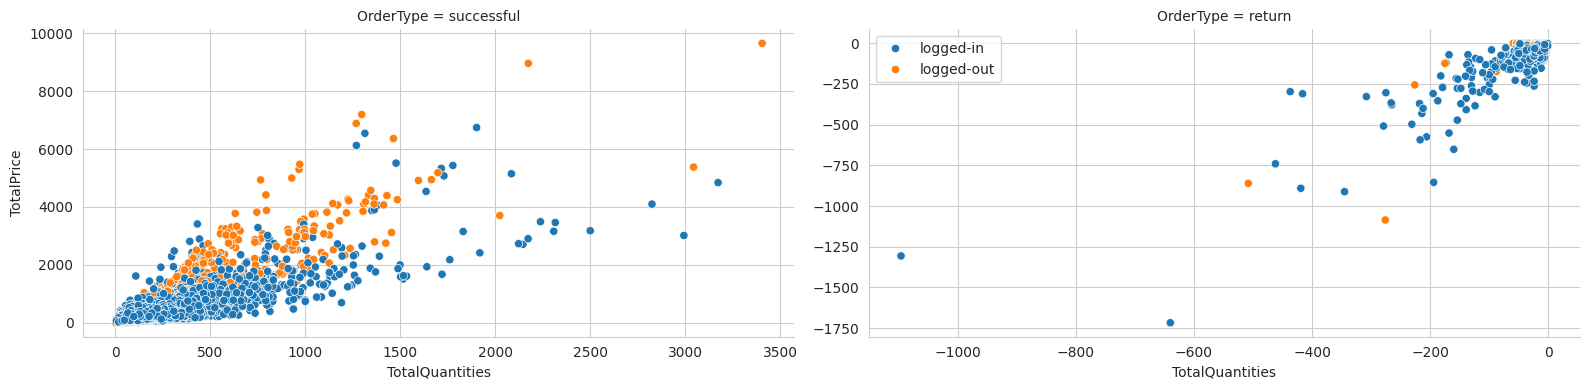

In [ ]:
grid = sns.FacetGrid(orders, col = 'OrderType', sharex = False, sharey = False, height = 4, aspect = 2)
grid.map(sns.scatterplot, 'TotalQuantities', 'TotalPrice', 'CustomerLoginStatus', hue_order = ['logged-in', 'logged-out'])
plt.legend()

In [ ]:
# Average/Mean Revenue per OrderType and CustomerLoginStatus.

pd.pivot_table(orders, index = 'CustomerLoginStatus', columns = 'OrderType', values = 'TotalPrice', aggfunc = 'mean').\
reindex(['successful', 'return'], axis = 1).reindex(['logged-out', 'logged-in'], axis = 0)

OrderType            successful     return
CustomerLoginStatus                       
logged-out           549.368621  -5.729321
logged-in            262.559981 -27.018875

###### 💡More return orders from logged-in customers (Kind of expected. 91% free returns from the logged-out customers)

In [ ]:
orders[orders['OrderType'] == 'return']['CustomerLoginStatus'].value_counts().reset_index().iplot(kind = 'pie', labels = 'CustomerLoginStatus',\
                                                                                                  values = 'count',\
                                                                                                  title = 'Return orders per CustomerLoginStatus')

In [ ]:
# 495/545 return orders from logged-out customers are free/0 value orders.

orders[(orders['OrderType'] == 'return') & (orders['CustomerLoginStatus'] == 'logged-out')]['TotalPrice'].value_counts()

TotalPrice
 0.00       495
-14.95        3
-15.60        1
-1085.64      1
-860.46       1
-3.75         1
-39.51        1
-12.24        1
-5.90         1
-9.72         1
-2.60         1
-4.13         1
-3.29         1
-9.90         1
-3.30         1
-25.75        1
-3.00         1
-4.88         1
-255.66       1
-11.85        1
-4.15         1
-14.75        1
-8.88         1
-6.59         1
-10.76        1
-173.27       1
-5.92         1
-12.95        1
-1.00         1
-4.95         1
-12.75        1
-30.70        1
-15.99        1
-5.95         1
-46.20        1
-7.95         1
-97.65        1
-12.94        1
-7.39         1
-10.20        1
-2.10         1
-1.25         1
-53.35        1
-123.20       1
-13.39        1
-2.95         1
-9.99         1
-7.98         1
-15.30        1
Name: count, dtype: int64

In [ ]:
(495/545)*100

90.82568807339449

##### Quantity and Price distribution.

<Axes: xlabel='TotalPrice'>

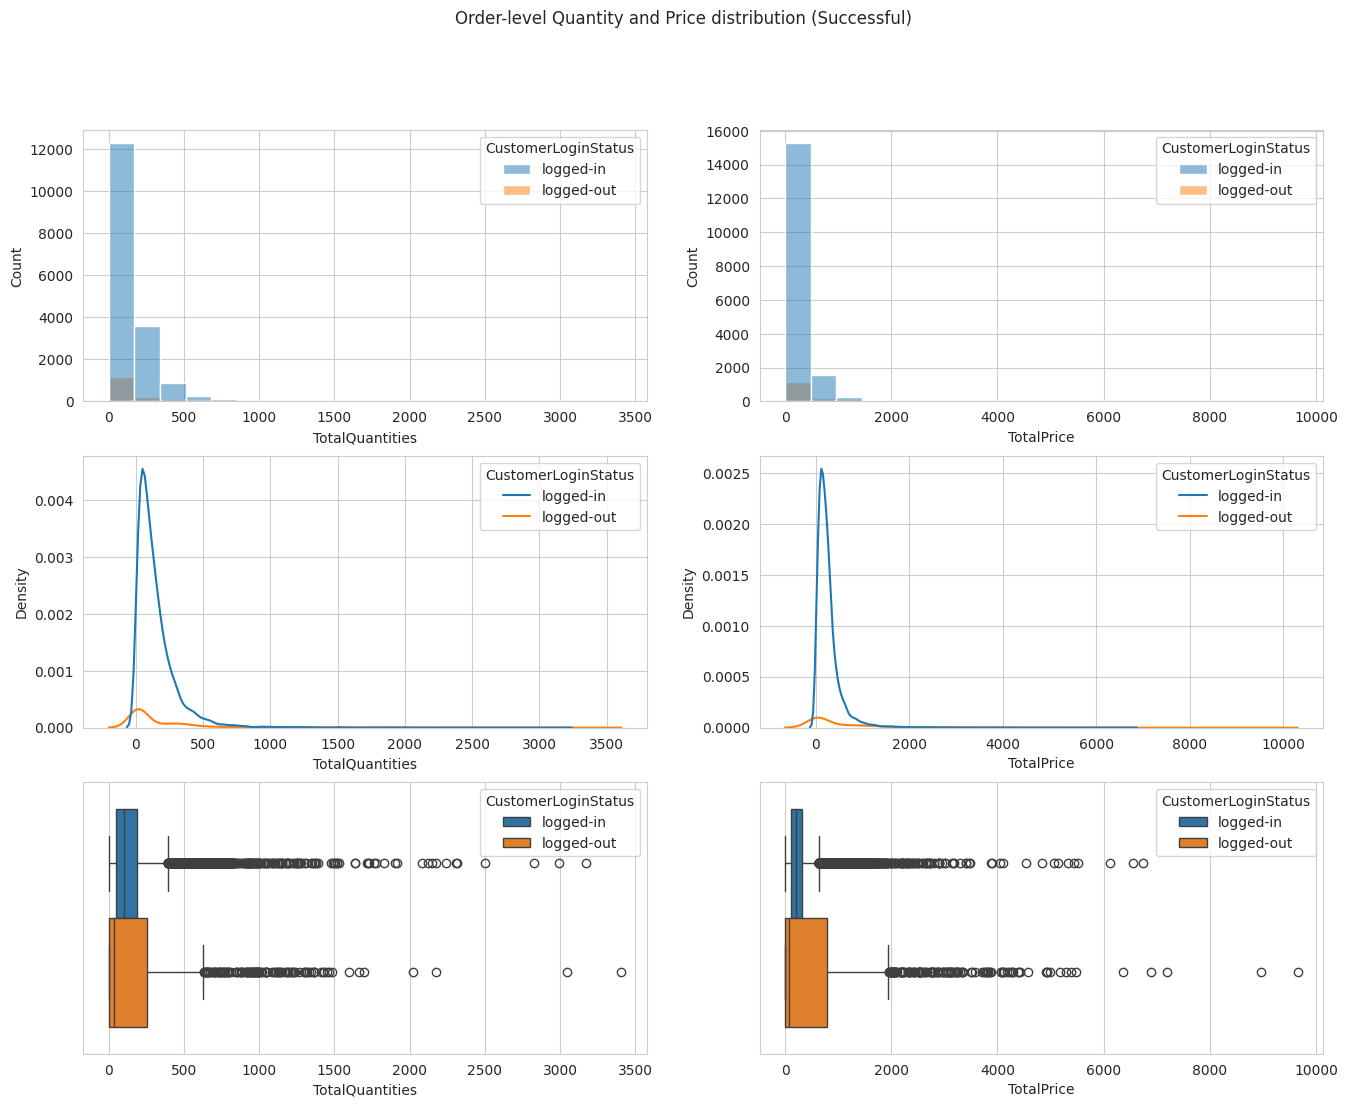

In [ ]:
figure = plt.figure(figsize = (16, 12))
figure.suptitle('Order-level Quantity and Price distribution (Successful)')
figure.add_subplot(3, 2, 1)
sns.histplot(orders[orders['OrderType'] == 'successful'], x = 'TotalQuantities', hue = 'CustomerLoginStatus', bins = 20, alpha = 0.5)
figure.add_subplot(3, 2, 2)
sns.histplot(orders[orders['OrderType'] == 'successful'], x = 'TotalPrice', hue = 'CustomerLoginStatus', bins = 20, alpha = 0.5)
figure.add_subplot(3, 2, 3)
sns.kdeplot(orders[orders['OrderType'] == 'successful'], x = 'TotalQuantities', hue = 'CustomerLoginStatus')
figure.add_subplot(3, 2, 4)
sns.kdeplot(orders[orders['OrderType'] == 'successful'], x = 'TotalPrice', hue = 'CustomerLoginStatus')
figure.add_subplot(3, 2, 5)
sns.boxplot(orders[orders['OrderType'] == 'successful'], x = 'TotalQuantities', hue = 'CustomerLoginStatus')
figure.add_subplot(3, 2, 6)
sns.boxplot(orders[orders['OrderType'] == 'successful'], x = 'TotalPrice', hue = 'CustomerLoginStatus')

(-250.0, 0.0)

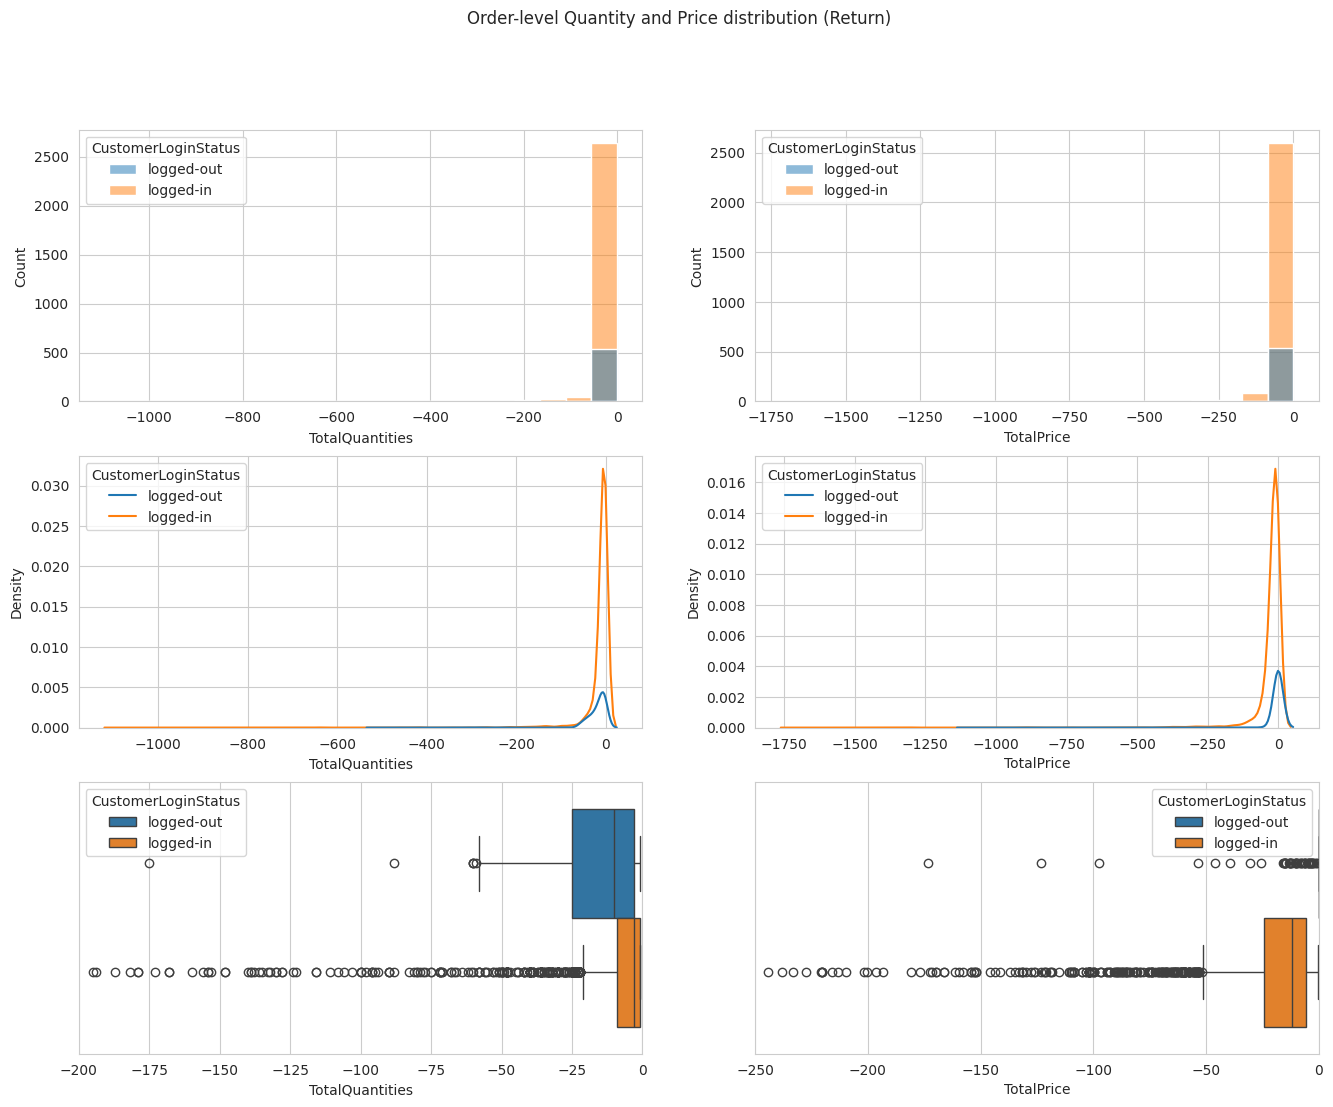

In [ ]:
figure = plt.figure(figsize = (16, 12))
figure.suptitle('Order-level Quantity and Price distribution (Return)')
figure.add_subplot(3, 2, 1)
sns.histplot(orders[orders['OrderType'] == 'return'], x = 'TotalQuantities', hue = 'CustomerLoginStatus', bins = 20, alpha = 0.5)
figure.add_subplot(3, 2, 2)
sns.histplot(orders[orders['OrderType'] == 'return'], x = 'TotalPrice', hue = 'CustomerLoginStatus', bins = 20, alpha = 0.5)
figure.add_subplot(3, 2, 3)
sns.kdeplot(orders[orders['OrderType'] == 'return'], x = 'TotalQuantities', hue = 'CustomerLoginStatus')
figure.add_subplot(3, 2, 4)
sns.kdeplot(orders[orders['OrderType'] == 'return'], x = 'TotalPrice', hue = 'CustomerLoginStatus')
figure.add_subplot(3, 2, 5)
sns.boxplot(orders[orders['OrderType'] == 'return'], x = 'TotalQuantities', hue = 'CustomerLoginStatus')
plt.xlim(-200, 0)
figure.add_subplot(3, 2, 6)
sns.boxplot(orders[orders['OrderType'] == 'return'], x = 'TotalPrice', hue = 'CustomerLoginStatus')
plt.xlim(-250, 0)

##### Geographical distribution.

In [ ]:
# Order distribution per country.

(orders['Country'].value_counts() / len(orders)) * 100

Country
United Kingdom          90.502768
Germany                  2.480083
France                   1.849935
EIRE                     1.444840
Belgium                  0.531125
Spain                    0.436603
Netherlands              0.369087
Switzerland              0.261061
Australia                0.252059
Portugal                 0.238556
Italy                    0.207049
Norway                   0.162038
Sweden                   0.157537
Finland                  0.148535
Channel Islands          0.126030
Poland                   0.103524
Denmark                  0.090021
Japan                    0.085520
Austria                  0.085520
Cyprus                   0.081019
Unspecified              0.058514
Israel                   0.040510
Malta                    0.036008
Iceland                  0.031507
USA                      0.031507
Hong Kong                0.031507
Czech Republic           0.022505
Greece                   0.022505
European Community       0.022505
Singapore                0.018004
Canada                   0.018004
Lithuania                0.013503
United Arab Emirates     0.009002
Saudi Arabia             0.009002
Bahrain                  0.009002
Lebanon                  0.004501
Brazil                   0.004501
RSA                      0.004501
Name: count, dtype: float64

In [ ]:
pd.pivot_table(orders.reset_index(), index = 'Country', columns = 'OrderType', values = 'InvoiceNo', aggfunc = len).sort_values('successful',\
                                                                                                                                ascending = False).\
                                                                                                                                reindex(['successful', 'return'], axis = 1).head(10).iplot(kind = 'bar', barmode = 'stack', yTitle = 'Orders', xTitle = 'Country', title = 'Total Orders for the top 10 countries with maximum successful orders')

In [ ]:
orders.groupby('Country')['TotalPrice'].sum().sort_values(ascending = False).head(10).iplot(kind = 'bar', xTitle = 'Country',
                                                                                            yTitle = 'Revenue (GBP)', title = 'Top 10 countries in terms of Revenue')

###### 💡IE & FR orders.

In [ ]:
# Free orders per country.

orders[orders['TotalPrice'] == 0]['Country'].value_counts()

Country
United Kingdom    848
Spain               1
Australia           1
Germany             1
Name: count, dtype: int64

In [ ]:
# IE with less orders has more revenue than FR because of higher AOV.

orders[orders['Country'].isin(['EIRE', 'France'])].reset_index().groupby('Country').agg(
    TotalOrders = ('InvoiceNo', lambda s: len(s)),
    AverageOrderValue = ('TotalPrice', lambda s: s.mean())
)

TotalOrders  AverageOrderValue
Country                                
EIRE             321         412.924922
France           411         305.666861

###### Return/Successful orders ratio.

In [ ]:
orders_per_country = pd.pivot_table(orders.reset_index(), index = 'Country', columns = 'OrderType', values = 'InvoiceNo', aggfunc = len).copy()
orders_per_country.fillna(0, inplace = True)
orders_per_country['TotalOrders'] = orders_per_country.sum(axis = 1)
orders_per_country['Return/SuccessfulOrdersRatio'] = orders_per_country['return'] / orders_per_country['successful']
orders_per_country.sort_values('Return/SuccessfulOrdersRatio')

OrderType             return  successful  TotalOrders  \
Country                                                 
Unspecified              0.0        13.0         13.0   
Greece                   0.0         5.0          5.0   
Lebanon                  0.0         1.0          1.0   
Lithuania                0.0         3.0          3.0   
Hong Kong                0.0         7.0          7.0   
RSA                      0.0         1.0          1.0   
Iceland                  0.0         7.0          7.0   
Canada                   0.0         4.0          4.0   
Brazil                   0.0         1.0          1.0   
United Arab Emirates     0.0         2.0          2.0   
Bahrain                  0.0         2.0          2.0   
Singapore                0.0         4.0          4.0   
Netherlands              2.0        80.0         82.0   
Norway                   2.0        34.0         36.0   
Finland                  3.0        30.0         33.0   
Denmark                  2.0        18.0         20.0   
France                  43.0       368.0        411.0   
Austria                  2.0        17.0         19.0   
Israel                   1.0         8.0          9.0   
Portugal                 6.0        47.0         53.0   
Spain                   12.0        85.0         97.0   
Sweden                   5.0        30.0         35.0   
United Kingdom        2956.0     17151.0      20107.0   
EIRE                    51.0       270.0        321.0   
Australia                9.0        47.0         56.0   
Cyprus                   3.0        15.0         18.0   
Belgium                 20.0        98.0        118.0   
Channel Islands          5.0        23.0         28.0   
Switzerland             11.0        47.0         58.0   
European Community       1.0         4.0          5.0   
Germany                116.0       435.0        551.0   
Poland                   5.0        18.0         23.0   
Japan                    5.0        14.0         19.0   
USA                      2.0         5.0          7.0   
Italy                   14.0        32.0         46.0   
Malta                    3.0         5.0          8.0   
Saudi Arabia             1.0         1.0          2.0   
Czech Republic           3.0         2.0          5.0   

OrderType             Return/SuccessfulOrdersRatio  
Country                                             
Unspecified                               0.000000  
Greece                                    0.000000  
Lebanon                                   0.000000  
Lithuania                                 0.000000  
Hong Kong                                 0.000000  
RSA                                       0.000000  
Iceland                                   0.000000  
Canada                                    0.000000  
Brazil                                    0.000000  
United Arab Emirates                      0.000000  
Bahrain                                   0.000000  
Singapore                                 0.000000  
Netherlands                               0.025000  
Norway                                    0.058824  
Finland                                   0.100000  
Denmark                                   0.111111  
France                                    0.116848  
Austria                                   0.117647  
Israel                                    0.125000  
Portugal                                  0.127660  
Spain                                     0.141176  
Sweden                                    0.166667  
United Kingdom                            0.172351  
EIRE                                      0.188889  
Australia                                 0.191489  
Cyprus                                    0.200000  
Belgium                                   0.204082  
Channel Islands                           0.217391  
Switzerland                               0.234043  
European Community                        0.250000  
Germany                

###### Maps.

In [ ]:
# For Plotly's Choropleth map.

country_code_mapping = {
    'United Kingdom': 'GBR',
    'France': 'FRA',
    'Australia': 'AUS',
    'Germany': 'DEU',
    'Norway': 'NOR',
    'EIRE': 'IRL',
    'Switzerland': 'CHE',
    'Poland': 'POL',
    'Portugal': 'PRT',
    'Italy': 'ITA',
    'Belgium': 'BEL',
    'Lithuania': 'LTU',
    'Japan': 'JPN',
    'Iceland': 'ISL',
    'Channel Islands': 'CHI',  # Jersey & Guernsey grouped as Channel Islands
    'Denmark': 'DNK',
    'Spain': 'ESP',
    'Cyprus': 'CYP',
    'Finland': 'FIN',
    'Austria': 'AUT',
    'Sweden': 'SWE',
    'Netherlands': 'NLD',
    'Israel': 'ISR',
    'Greece': 'GRC',
    'Hong Kong': 'HKG',
    'Singapore': 'SGP',
    'Lebanon': 'LBN',
    'United Arab Emirates': 'ARE',
    'Saudi Arabia': 'SAU',
    'Czech Republic': 'CZE',
    'Canada': 'CAN',
    'Unspecified': None,  # No valid mapping
    'Brazil': 'BRA',
    'USA': 'USA',
    'European Community': 'EUU',  # Broad entity, not a country
    'Bahrain': 'BHR',
    'Malta': 'MLT',
    'RSA': 'ZAF'  # Republic of South Africa
}

In [ ]:
orders['CountryCode'] = orders['Country'].map(country_code_mapping)
orders

InvoiceTimestamp   OrderType  TotalQuantities  TotalPrice  \
InvoiceNo                                                                
536365    2010-12-01 08:26:00  successful               20       81.48   
536366    2010-12-01 08:28:00  successful                6       11.10   
536367    2010-12-01 08:34:00  successful               45      199.15   
536368    2010-12-01 08:34:00  successful               15       70.05   
536369    2010-12-01 08:35:00  successful                3       17.85   
...                       ...         ...              ...         ...   
C581465   2011-12-08 18:59:00      return               -6       -9.90   
C581466   2011-12-08 19:20:00      return               -6      -34.90   
C581468   2011-12-08 19:26:00      return              -22      -25.68   
C581490   2011-12-09 09:57:00      return              -23      -32.53   
C581569   2011-12-09 11:58:00      return               -6       -7.50   

          CustomerID CustomerLoginStatus         Country InvoiceDate  \
InvoiceNo                                                              
536365         17850           logged-in  United Kingdom  2010-12-01   
536366         17850           logged-in  United Kingdom  2010-12-01   
536367         13047           logged-in  United Kingdom  2010-12-01   
536368         13047           logged-in  United Kingdom  2010-12-01   
536369         13047           logged-in  United Kingdom  2010-12-01   
...              ...                 ...             ...         ...   
C581465        15755           logged-in  United Kingdom  2011-12-08   
C581466        13883           logged-in  United Kingdom  2011-12-08   
C581468        13599           logged-in  United Kingdom  2011-12-08   
C581490        14397           logged-in  United Kingdom  2011-12-09   
C581569        17315           logged-in  United Kingdom  2011-12-09   

           InvoiceYear InvoiceMonth  InvoiceDayOfMonth InvoiceDayOfWeek  \
InvoiceNo                                                                 
536365            2010     December                  1        Wednesday   
536366            2010     December                  1        Wednesday   
536367            2010     December                  1        Wednesday   
536368            2010     December                  1        Wednesday   
536369            2010     December                  1        Wednesday   
...                ...          ...                ...              ...   
C581465           2011     December                  8         Thursday   
C581466           2011     December                  8         Thursday   
C581468           2011     December                  8         Thursday   
C581490           2011     December                  9           Friday   
C581569           2011     December                  9           Friday   

           InvoiceHourOfDay CountryCode  
InvoiceNo                                
536365                    8         GBR  
536366                    8         GBR  
536367                    8         GBR  
536368                    8         GBR  
536369                    8         GBR  
...                     ...         ...  
C581465                  18         GBR  
C581466                  19         GBR  
C581468                  19         GBR  
C581490                   9         GBR  
C581569                  11         GBR  

[22217 rows x 14 columns]

In [ ]:
countries = pd.concat([orders[['Country', 'CountryCode']].drop_duplicates().set_index('Country'),
                       orders['Country'].value_counts(),
                       orders.groupby('Country')[['TotalQuantities', 'TotalPrice']].sum()],
                      axis = 1).copy()
countries.columns = ['CountryCode', 'TotalInvoices', 'TotalQuantities', 'TotalPrice']
countries

CountryCode  TotalInvoices  TotalQuantities   TotalPrice
Country                                                                      
United Kingdom               GBR          20107          2362958  4632052.004
France                       FRA            411            75451   125629.080
Australia                    AUS             56             9453    27541.510
Netherlands                  NLD             82            20595    52378.210
Germany                      DEU            551            83939   142927.490
Norway                       NOR             36            12786    22454.150
EIRE                         IRL            321            65013   132548.900
Switzerland                  CHE             58            20598    35895.190
Spain                        ESP             97            16821    29581.870
Poland                       POL             23             2981     5723.160
Portugal                     PRT             53            11525    19285.710
Italy                        ITA             46             5515    11351.140
Belgium                      BEL            118            17453    30728.730
Lithuania                    LTU              3              466     1152.800
Japan                        JPN             19             4755    12202.520
Iceland                      ISL              7             1944     3413.340
Channel Islands              CHI             28             6155    12710.970
Denmark                      DNK             20             5177    12361.580
Cyprus                       CYP             18             3633     7774.700
Finland                      FIN             33             5570     9655.300
Austria                      AUT             19             3293     6034.450
Sweden                       SWE             35             3230     5933.090
Israel                       ISR              9             3140     5330.680
Greece                       GRC              5             1200     3551.460
Hong Kong                    HKG              7             3497     6675.370
Singapore                    SGP              4             2611     5278.950
Lebanon                      LBN              1              274     1261.000
United Arab Emirates         ARE              2              638     1233.460
Saudi Arabia                 SAU              2               63      126.130
Czech Republic               CZE              5              375      565.720
Canada                       CAN              4             1571     2087.020
Unspecified                 None             13             2612     3557.580
Brazil                       BRA              1              316      918.240
USA                          USA              7              717     1210.490
European Community           EUU              5              372      978.550
Bahrain                      BHR              2              144      326.400
Malta                        MLT              8              789     1491.170
RSA                          ZAF              1              238      686.870

In [ ]:
df[df['Country'] == 'USA']['InvoiceNo'].nunique(), df[df['Country'] == 'USA']['Quantity'].sum()

(7, np.int64(717))

In [ ]:
data = dict(type = 'choropleth',
            locations = countries['CountryCode'],
            text = countries.reset_index()[['Country', 'TotalInvoices']],
            z = countries['TotalPrice'],
            colorscale = 'ylorrd',
            colorbar = {'title': 'Revenue (GBP)'},
            marker = dict(line = dict(color = 'rgb(0,0,0)', width = 2)))

layout = dict(title = 'Revenue & Orders',
              geo = dict(showframe = False,
                         projection = dict(type = 'natural earth')))

choromap = go.Figure([data], layout)
iplot(choromap)

###### 💡Average Order Value and Cart Size.

In [ ]:
countries['AverageOrderValue'] = countries['TotalPrice'] / countries['TotalInvoices']
countries['AverageCartSize'] = countries['TotalQuantities'] / countries['TotalInvoices']
countries

CountryCode  TotalInvoices  TotalQuantities   TotalPrice  \
Country                                                                         
United Kingdom               GBR          20107          2362958  4632052.004   
France                       FRA            411            75451   125629.080   
Australia                    AUS             56             9453    27541.510   
Netherlands                  NLD             82            20595    52378.210   
Germany                      DEU            551            83939   142927.490   
Norway                       NOR             36            12786    22454.150   
EIRE                         IRL            321            65013   132548.900   
Switzerland                  CHE             58            20598    35895.190   
Spain                        ESP             97            16821    29581.870   
Poland                       POL             23             2981     5723.160   
Portugal                     PRT             53            11525    19285.710   
Italy                        ITA             46             5515    11351.140   
Belgium                      BEL            118            17453    30728.730   
Lithuania                    LTU              3              466     1152.800   
Japan                        JPN             19             4755    12202.520   
Iceland                      ISL              7             1944     3413.340   
Channel Islands              CHI             28             6155    12710.970   
Denmark                      DNK             20             5177    12361.580   
Cyprus                       CYP             18             3633     7774.700   
Finland                      FIN             33             5570     9655.300   
Austria                      AUT             19             3293     6034.450   
Sweden                       SWE             35             3230     5933.090   
Israel                       ISR              9             3140     5330.680   
Greece                       GRC              5             1200     3551.460   
Hong Kong                    HKG              7             3497     6675.370   
Singapore                    SGP              4             2611     5278.950   
Lebanon                      LBN              1              274     1261.000   
United Arab Emirates         ARE              2              638     1233.460   
Saudi Arabia                 SAU              2               63      126.130   
Czech Republic               CZE              5              375      565.720   
Canada                       CAN              4             1571     2087.020   
Unspecified                 None             13             2612     3557.580   
Brazil                       BRA              1              316      918.240   
USA                          USA              7              717     1210.490   
European Community           EUU              5              372      978.550   
Bahrain                      BHR              2              144      326.400   
Malta                        MLT              8              789     1491.170   
RSA                          ZAF              1              238      686.870   

                      AverageOrderValue  AverageCartSize  
Country                                                   
United Kingdom               230.370120       117.519172  
France                       305.666861       183.579075  
Australia                    491.812679       168.803571  
Netherlands                  638.758659       251.158537  
Germany                      259.396534       152.339383  
Norway                       623.726389       355.166667  
EIRE                         412.924922       202.532710  
Switzerland                  618.882586       355.137931  
Spain                        304.967732       173.412371  
Poland                       248.833043       129.608696  
Portugal                     363.881321       217.452830  
Italy        

In [ ]:
data = dict(type = 'choropleth',
            locations = countries['CountryCode'],
            text = countries.reset_index()[['Country', 'TotalInvoices']],
            z = countries['AverageOrderValue'],
            colorscale = 'ylorrd',
            colorbar = {'title': 'Average Order Value (GBP)'},
            marker = dict(line = dict(color = 'rgb(0,0,0)', width = 2)))

layout = dict(title = 'Average Order Value & Orders',
              geo = dict(showframe = False,
                         projection = dict(type = 'natural earth')))

choromap = go.Figure([data], layout)
iplot(choromap)

In [ ]:
data = dict(type = 'choropleth',
            locations = countries['CountryCode'],
            text = countries.reset_index()[['Country', 'TotalInvoices']],
            z = countries['AverageCartSize'],
            colorscale = 'ylorrd',
            colorbar = {'title': 'Average Cart Size'},
            marker = dict(line = dict(color = 'rgb(0,0,0)', width = 2)))

layout = dict(title = 'Average Cart Size & Orders',
              geo = dict(showframe = False,
                         projection = dict(type = 'natural earth')))

choromap = go.Figure([data], layout)
iplot(choromap)

#### Products.

In [ ]:
products = df[['StockCode', 'Description', 'Category', 'Sub-Category']].drop_duplicates().set_index('StockCode').copy()
products

Description        Category  \
StockCode                                                        
84029G     KNITTED UNION FLAG HOT WATER BOTTLE  Home & Kitchen   
84029E          RED WOOLLY HOTTIE WHITE HEART.  Home & Kitchen   
22752             SET 7 BABUSHKA NESTING BOXES  Home & Kitchen   
21730        GLASS STAR FROSTED T-LIGHT HOLDER  Home & Kitchen   
22633                   HAND WARMER UNION JACK    Toys & Games   
...                                        ...             ...   
23617      SET 10 CARDS SWIRLY XMAS TREE 17104      Stationery   
22802                 FAUX FUR CHOCOLATE THROW      Home Decor   
90214U               LETTER "U" BLING KEY RING     Accessories   
84679                CLASSICAL ROSE TABLE LAMP        Lighting   
47591B                SCOTTIES CHILDRENS APRON  Home & Kitchen   

                     Sub-Category  
StockCode                          
84029G         Bedding & Cushions  
84029E         Bedding & Cushions  
22752      Storage & Organization  
21730                    Lighting  
22633         Outdoor Toys & Gear  
...                           ...  
23617              Greeting Cards  
22802                      Throws  
90214U                  Keychains  
84679                       Lamps  
47591B                     Aprons  

[3153 rows x 3 columns]

In [ ]:
products = pd.concat([
    products,
    df.groupby('StockCode').agg(
        TotalInvoices = ('InvoiceNo', lambda s: s.nunique()),
        TotalQuantities = ('Quantity', lambda s: s.sum()),
        TotalPrice = ('TotalPrice', lambda s: s.sum()))],
                     axis = 1)
products

Description        Category  \
StockCode                                                        
84029G     KNITTED UNION FLAG HOT WATER BOTTLE  Home & Kitchen   
84029E          RED WOOLLY HOTTIE WHITE HEART.  Home & Kitchen   
22752             SET 7 BABUSHKA NESTING BOXES  Home & Kitchen   
21730        GLASS STAR FROSTED T-LIGHT HOLDER  Home & Kitchen   
22633                   HAND WARMER UNION JACK    Toys & Games   
...                                        ...             ...   
23617      SET 10 CARDS SWIRLY XMAS TREE 17104      Stationery   
22802                 FAUX FUR CHOCOLATE THROW      Home Decor   
90214U               LETTER "U" BLING KEY RING     Accessories   
84679                CLASSICAL ROSE TABLE LAMP        Lighting   
47591B                SCOTTIES CHILDRENS APRON  Home & Kitchen   

                     Sub-Category  TotalInvoices  TotalQuantities  TotalPrice  
StockCode                                                                      
84029G         Bedding & Cushions            459             2918    13669.79  
84029E         Bedding & Cushions            428             2728    12687.53  
22752      Storage & Organization            310             1407    10694.19  
21730                    Lighting            139              504     2450.78  
22633         Outdoor Toys & Gear            473             3324     7317.36  
...                           ...            ...              ...         ...  
23617              Greeting Cards              1                2        5.82  
22802                      Throws              5               19      151.05  
90214U                  Keychains              1               12        3.48  
84679                       Lamps              1                4       15.80  
47591B                     Aprons              1                1        4.13  

[3153 rows x 6 columns]

In [ ]:
products['SuccessfulOrders'] = df[df['Quantity'] > 0].groupby('StockCode')['InvoiceNo'].nunique()
products['ReturnOrders'] = df[df['Quantity'] < 0].groupby('StockCode')['InvoiceNo'].nunique()
products.fillna(0, inplace = True)
products['SuccessfulOrders'] = products['SuccessfulOrders'].astype(int)
products['ReturnOrders'] = products['ReturnOrders'].astype(int)
products

Description        Category  \
StockCode                                                        
84029G     KNITTED UNION FLAG HOT WATER BOTTLE  Home & Kitchen   
84029E          RED WOOLLY HOTTIE WHITE HEART.  Home & Kitchen   
22752             SET 7 BABUSHKA NESTING BOXES  Home & Kitchen   
21730        GLASS STAR FROSTED T-LIGHT HOLDER  Home & Kitchen   
22633                   HAND WARMER UNION JACK    Toys & Games   
...                                        ...             ...   
23617      SET 10 CARDS SWIRLY XMAS TREE 17104      Stationery   
22802                 FAUX FUR CHOCOLATE THROW      Home Decor   
90214U               LETTER "U" BLING KEY RING     Accessories   
84679                CLASSICAL ROSE TABLE LAMP        Lighting   
47591B                SCOTTIES CHILDRENS APRON  Home & Kitchen   

                     Sub-Category  TotalInvoices  TotalQuantities  TotalPrice  \
StockCode                                                                       
84029G         Bedding & Cushions            459             2918    13669.79   
84029E         Bedding & Cushions            428             2728    12687.53   
22752      Storage & Organization            310             1407    10694.19   
21730                    Lighting            139              504     2450.78   
22633         Outdoor Toys & Gear            473             3324     7317.36   
...                           ...            ...              ...         ...   
23617              Greeting Cards              1                2        5.82   
22802                      Throws              5               19      151.05   
90214U                  Keychains              1               12        3.48   
84679                       Lamps              1                4       15.80   
47591B                     Aprons              1                1        4.13   

           SuccessfulOrders  ReturnOrders  
StockCode                                  
84029G                  455             4  
84029E                  420             8  
22752                   306             4  
21730                   131             8  
22633                   465             8  
...                     ...           ...  
23617                     1             0  
22802                     5             0  
90214U                    1             0  
84679                     1             0  
47591B                    1             0  

[3153 rows x 8 columns]

In [ ]:
products[['Description', 'SuccessfulOrders', 'ReturnOrders']].set_index('Description').sort_values('SuccessfulOrders', ascending = False).\
head(10).iplot(kind = 'bar', barmode = 'stack', xTitle = 'Description', yTitle = 'Orders',\
               title = 'Total Orders for the top 10 products with maximum successful orders')

In [ ]:
products[['Description', 'TotalPrice']].sort_values('TotalPrice', ascending = False).head(10).set_index('Description').iplot(kind = 'bar',\
                                                                                                                             xTitle = 'Description',\
                                                                                                                             yTitle = 'Revenue (GBP)',
                                                                                                                             title = 'Top 10 products in terms of Revenue')

In [ ]:
# Free products.

products[products['TotalPrice'] == 0]['Description']

StockCode
85067          CREAM SWEETHEART WALL CABINET
21763               VINTAGE WOODEN BAR STOOL
22833            HALL CABINET WITH 3 DRAWERS
21655     HANGING RIDGE GLASS T-LIGHT HOLDER
21667             GLASS CAKE COVER AND PLATE
22769           CHALKBOARD KITCHEN ORGANISER
C2                                  CARRIAGE
22764     RUSTIC WOODEN CABINET, GLASS DOORS
20785                FUSCHIA RETRO BAR STOOL
84873A         FUNKY FLOWER PICNIC BAG FOR 4
22656           VINTAGE BLUE KITCHEN CABINET
22827      RUSTIC SEVENTEEN DRAWER SIDEBOARD
Name: Description, dtype: object

##### Categories and Sub-Categories.

In [ ]:
products.groupby('Category')[['TotalInvoices', 'TotalPrice']].sum().iplot(kind = 'bar', xTitle = 'Product Category', yTitle = 'Orders & Revenue (GBP)',\
                                                                          title = 'Total Orders & Revenue per product category')

In [ ]:
products[products['Category'].isin(['Toys & Games'])].\
groupby(['Category', 'Sub-Category'])[['TotalInvoices', 'TotalPrice']].sum().iplot(kind = 'bar',
                                                                                   xTitle = 'Category & Sub-Categories',
                                                                                   yTitle = 'Orders & Revenue (GBP)',
                                                                                   title = 'Orders & Revenue per product category/sub-categories')

In [ ]:
df.rename({
    'InvoiceDate': 'InvoiceTimestamp'
}, axis = 1, inplace = True)
df['InvoiceDate'] = df['InvoiceTimestamp'].apply(lambda dt: dt.date())
df

InvoiceNo StockCode                          Description  Quantity  \
0         536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
1         536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
2         536365     22752         SET 7 BABUSHKA NESTING BOXES         2   
3         536365     21730    GLASS STAR FROSTED T-LIGHT HOLDER         6   
4         536366     22633               HAND WARMER UNION JACK         6   
...          ...       ...                                  ...       ...   
411242    581587     22629                   SPACEBOY LUNCH BOX        12   
411243    581587     22613          PACK OF 20 SPACEBOY NAPKINS        12   
411244    581587     22899          CHILDREN'S APRON DOLLY GIRL         6   
411245    581587     23255      CHILDRENS CUTLERY CIRCUS PARADE         4   
411246    581587     22138         BAKING SET 9 PIECE RETROSPOT         3   

          InvoiceTimestamp  UnitPrice CustomerID         Country  \
0      2010-12-01 08:26:00       3.39      17850  United Kingdom   
1      2010-12-01 08:26:00       3.39      17850  United Kingdom   
2      2010-12-01 08:26:00       7.65      17850  United Kingdom   
3      2010-12-01 08:26:00       4.25      17850  United Kingdom   
4      2010-12-01 08:28:00       1.85      17850  United Kingdom   
...                    ...        ...        ...             ...   
411242 2011-12-09 12:50:00       1.95      12680          France   
411243 2011-12-09 12:50:00       0.85      12680          France   
411244 2011-12-09 12:50:00       2.10      12680          France   
411245 2011-12-09 12:50:00       4.15      12680          France   
411246 2011-12-09 12:50:00       4.95      12680          France   

              Category            Sub-Category  TotalPrice InvoiceDate  
0       Home & Kitchen      Bedding & Cushions       20.34  2010-12-01  
1       Home & Kitchen      Bedding & Cushions       20.34  2010-12-01  
2       Home & Kitchen  Storage & Organization       15.30  2010-12-01  
3       Home & Kitchen                Lighting       25.50  2010-12-01  
4         Toys & Games     Outdoor Toys & Gear       11.10  2010-12-01  
...                ...                     ...         ...         ...  
411242  Home & Kitchen             Lunch Boxes       23.40  2011-12-09  
411243  Party Supplies               Tableware       10.20  2011-12-09  
411244  Home & Kitchen                    Kids       12.60  2011-12-09  
411245     Accessories               Tableware       16.60  2011-12-09  
411246  Home & Kitchen         Baking Supplies       14.85  2011-12-09  

[411247 rows x 12 columns]

##### 💡Orders timeline.

In [ ]:
pd.pivot_table(df, index = 'InvoiceDate', columns = 'Category', values = 'InvoiceNo', aggfunc = lambda s: s.nunique()).iplot(kind = 'line')

##### 💡Bubble plot: Visualize products across categories.

In [ ]:
products['TotalInvoicesScaled'] = (products['TotalInvoices'] / products['TotalInvoices'].max()) * 100
products['TotalInvoicesScaled']

StockCode
84029G    23.918708
84029E    22.303283
22752     16.154247
21730      7.243356
22633     24.648254
            ...    
23617      0.052110
22802      0.260552
90214U     0.052110
84679      0.052110
47591B     0.052110
Name: TotalInvoicesScaled, Length: 3153, dtype: float64

In [ ]:
fig = px.scatter(products, x = 'TotalQuantities', y = 'TotalPrice', size = 'TotalInvoices', color = 'Category',\
                 color_discrete_sequence = px.colors.qualitative.Dark2)
fig.show()

##### Return/Successful orders ratio.

In [ ]:
products['Return/SuccessfulOrdersRatio'] = products['ReturnOrders'] / products['SuccessfulOrders']
products['Return/SuccessfulOrdersRatio'] = products['Return/SuccessfulOrdersRatio'].apply(lambda ratio: round(ratio, 2))
products[['ReturnOrders', 'SuccessfulOrders', 'Return/SuccessfulOrdersRatio']].sort_values('Return/SuccessfulOrdersRatio', ascending = False)

ReturnOrders  SuccessfulOrders  Return/SuccessfulOrdersRatio
StockCode                                                              
20785                 1                 0                           inf
79320                 1                 0                           inf
22769                 1                 0                           inf
84839                 1                 0                           inf
85068                 2                 0                           inf
...                 ...               ...                           ...
21369                 0                16                           0.0
22218                 0                 2                           0.0
84802A                0                 2                           0.0
21186                 0                 2                           0.0
47591B                0                 1                           0.0

[3153 rows x 3 columns]

In [ ]:
# Return/Successful orders ratio (Products with orders more than the total average orders(/product))

products[products['TotalInvoices'] > products['TotalInvoices'].mean()][['Description', 'ReturnOrders', 'SuccessfulOrders', 'Return/SuccessfulOrdersRatio']].\
sort_values('Return/SuccessfulOrdersRatio', ascending = False).head(50)

Description  ReturnOrders  \
StockCode                                                      
POST                                   POSTAGE            64   
M                                       Manual            67   
37449       CERAMIC CAKE STAND + HANGING CAKES            25   
84949            SILVER HANGING T-LIGHT HOLDER            35   
23111                    PARISIENNE SEWING BOX            16   
22061       LARGE CAKE STAND HANGING STRAWBERY            15   
21658                        GLASS BEURRE DISH            25   
75049L            LARGE CIRCULAR MIRROR MOBILE            20   
22634            CHILDS BREAKFAST SET SPACEBOY            23   
22768               FAMILY PHOTO FRAME CORNICE            25   
22891                     TEA FOR ONE POLKADOT            18   
23110                   PARISIENNE KEY CABINET            28   
22838            3 TIER CAKE TIN RED AND CREAM            14   
23146           TRIPLE HOOK ANTIQUE IVORY ROSE            22   
85048      15CM CHRISTMAS GLASS BALL 20 LIGHTS            22   
22649             STRAWBERRY FAIRY CAKE TEAPOT            20   
22180                           RETROSPOT LAMP            13   
37450        CERAMIC CAKE BOWL + HANGING CAKES            12   
22842                  BISCUIT TIN VINTAGE RED            14   
22942               CHRISTMAS LIGHTS 10 SANTAS            12   
22890       NOVELTY BISCUITS CAKE STAND 3 TIER            12   
22636       CHILDS BREAKFAST SET CIRCUS PARADE            14   
23112                 PARISIENNE CURIO CABINET            19   
22364             GLASS JAR DIGESTIVE BISCUITS            14   
22941             CHRISTMAS LIGHTS 10 REINDEER            20   
23243      SET OF TEA COFFEE SUGAR TINS PANTRY            35   
22960                 JAM MAKING SET WITH JARS            87   
22767               TRIPLE PHOTO FRAME CORNICE            17   
21314            SMALL GLASS HEART TRINKET POT            40   
37446       MINI CAKE STAND WITH HANGING CAKES            12   
23165            LARGE CERAMIC TOP STORAGE JAR            18   
22360          GLASS JAR ENGLISH CONFECTIONERY            16   
21452                      TOADSTOOL MONEY BOX            12   
22839          3 TIER CAKE TIN GREEN AND CREAM            10   
23092          LARGE ANTIQUE WHITE PHOTO FRAME             9   
21844                        RED RETROSPOT MUG            11   
22456           NATURAL SLATE CHALKBOARD LARGE            32   
21463                      MIRRORED DISCO BALL             8   
22798         ANTIQUE GLASS DRESSING TABLE POT            17   
37448          CERAMIC CAKE DESIGN SPOTTED MUG            12   
22962                    JAM JAR WITH PINK LID            21   
22064                PINK DOUGHNUT TRINKET POT            14   
21363                  HOME SMALL WOOD LETTERS             7   
22990               COTTON APRON PANTRY DESIGN            10   
22781                    GUMBALL MAGAZINE RACK            13   
22780           LIGHT GARLAND BUTTERFLIES PINK             8   
21231           SWEETHEART CERAMIC TRINKET BOX            27   
21730        GLASS STAR FROSTED T-LIGHT HOLDER             8   
22244               3 HOOK HANGER MAGIC GARDEN             9   
22231               JIGSAW TREE WITH BIRDHOUSE             9   

           SuccessfulOrders  Return/SuccessfulOrdersRatio  
StockCode                                                  
POST                    177                          0.36  
M                       209                          0.32  
37449                   152                          0.16  
84949                   268                          0.13  
23111                   125                          0.13  
22061                   130                          0.12  
21658                   213                          0.12  
75049L                  164                          0.12  
22634                   209                          0.11  
22768                   231                   

In [ ]:
categories = pd.concat([df[df['Quantity'] > 0].groupby('Category')['InvoiceNo'].nunique(),
                        df[df['Quantity'] < 0].groupby('Category')['InvoiceNo'].nunique()],
                       axis = 1).copy()
categories.columns = ['SuccessfulOrders', 'ReturnOrders']
categories.iplot(kind = 'bar', barmode = 'stack', xTitle = 'Category', yTitle = 'Orders', title = 'Successful & Return Orders per category')

##### Quantity and Price distribution.

(0.0, 20000.0)

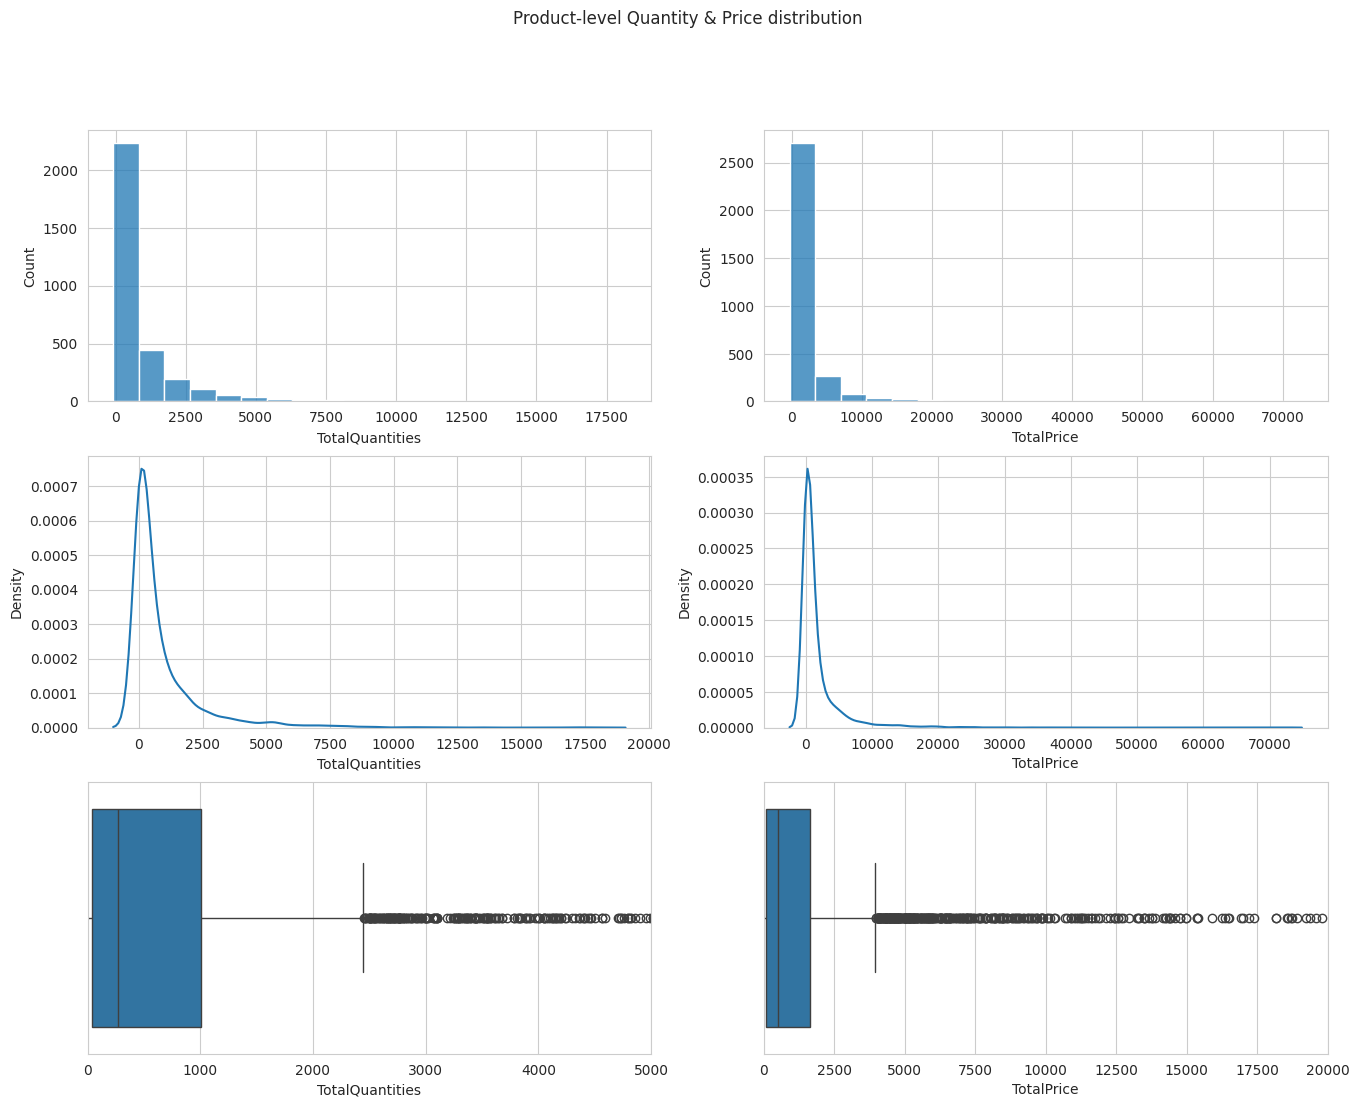

In [ ]:
figure = plt.figure(figsize = (16, 12))
figure.add_subplot(3, 2, 1)
figure.suptitle('Product-level Quantity & Price distribution')
sns.histplot(products, x = 'TotalQuantities', bins = 20)
figure.add_subplot(3, 2, 2)
sns.histplot(products, x = 'TotalPrice', bins = 20)
figure.add_subplot(3, 2, 3)
sns.kdeplot(products, x = 'TotalQuantities')
figure.add_subplot(3, 2, 4)
sns.kdeplot(products, x = 'TotalPrice')
figure.add_subplot(3, 2, 5)
sns.boxplot(products, x = 'TotalQuantities')
plt.xlim(0, 5000)
figure.add_subplot(3, 2, 6)
sns.boxplot(products, x = 'TotalPrice')
plt.xlim(0, 20000)

##### 💡 Pareto's 80-20 principle.

In [ ]:
# 80% of the business comes from 20% of the products.

(products['TotalPrice'].sort_values(ascending = False).values[: math.ceil(len(products) * 0.2)].sum() / products['TotalPrice'].sum()) * 100

76.17887815571198

#### Customers.

In [ ]:
countries = pd.concat([countries,
                       df[df['CustomerID'] != 'unknown'].groupby('Country')['CustomerID'].nunique()], axis = 1)
countries.rename({
    'CustomerID': 'TotalCustomers'
    }, axis = 1, inplace = True)
countries

CountryCode  TotalInvoices  TotalQuantities   TotalPrice  \
Country                                                                         
United Kingdom               GBR          20107          2362958  4632052.004   
France                       FRA            411            75451   125629.080   
Australia                    AUS             56             9453    27541.510   
Netherlands                  NLD             82            20595    52378.210   
Germany                      DEU            551            83939   142927.490   
Norway                       NOR             36            12786    22454.150   
EIRE                         IRL            321            65013   132548.900   
Switzerland                  CHE             58            20598    35895.190   
Spain                        ESP             97            16821    29581.870   
Poland                       POL             23             2981     5723.160   
Portugal                     PRT             53            11525    19285.710   
Italy                        ITA             46             5515    11351.140   
Belgium                      BEL            118            17453    30728.730   
Lithuania                    LTU              3              466     1152.800   
Japan                        JPN             19             4755    12202.520   
Iceland                      ISL              7             1944     3413.340   
Channel Islands              CHI             28             6155    12710.970   
Denmark                      DNK             20             5177    12361.580   
Cyprus                       CYP             18             3633     7774.700   
Finland                      FIN             33             5570     9655.300   
Austria                      AUT             19             3293     6034.450   
Sweden                       SWE             35             3230     5933.090   
Israel                       ISR              9             3140     5330.680   
Greece                       GRC              5             1200     3551.460   
Hong Kong                    HKG              7             3497     6675.370   
Singapore                    SGP              4             2611     5278.950   
Lebanon                      LBN              1              274     1261.000   
United Arab Emirates         ARE              2              638     1233.460   
Saudi Arabia                 SAU              2               63      126.130   
Czech Republic               CZE              5              375      565.720   
Canada                       CAN              4             1571     2087.020   
Unspecified                 None             13             2612     3557.580   
Brazil                       BRA              1              316      918.240   
USA                          USA              7              717     1210.490   
European Community           EUU              5              372      978.550   
Bahrain                      BHR              2              144      326.400   
Malta                        MLT              8              789     1491.170   
RSA                          ZAF              1              238      686.870   

                      AverageOrderValue  AverageCartSize  TotalCustomers  
Country                                                                   
United Kingdom               230.370120       117.519172          3851.0  
France                       305.666861       183.579075            87.0  
Australia                    491.812679       168.803571             9.0  
Netherlands                  638.758659       251.158537             9.0  
Germany                      259.396534       152.339383            95.0  
Norway                       623.726389       355.166667            10.0  
EIRE                         412.924922       202.532710             3.0  
Switzerland                  618.882586       355.137931            21.0  
Spain                        3

In [ ]:
countries['AverageCustomerValue'] = countries['TotalPrice'] / countries['TotalCustomers']
countries

CountryCode  TotalInvoices  TotalQuantities   TotalPrice  \
Country                                                                         
United Kingdom               GBR          20107          2362958  4632052.004   
France                       FRA            411            75451   125629.080   
Australia                    AUS             56             9453    27541.510   
Netherlands                  NLD             82            20595    52378.210   
Germany                      DEU            551            83939   142927.490   
Norway                       NOR             36            12786    22454.150   
EIRE                         IRL            321            65013   132548.900   
Switzerland                  CHE             58            20598    35895.190   
Spain                        ESP             97            16821    29581.870   
Poland                       POL             23             2981     5723.160   
Portugal                     PRT             53            11525    19285.710   
Italy                        ITA             46             5515    11351.140   
Belgium                      BEL            118            17453    30728.730   
Lithuania                    LTU              3              466     1152.800   
Japan                        JPN             19             4755    12202.520   
Iceland                      ISL              7             1944     3413.340   
Channel Islands              CHI             28             6155    12710.970   
Denmark                      DNK             20             5177    12361.580   
Cyprus                       CYP             18             3633     7774.700   
Finland                      FIN             33             5570     9655.300   
Austria                      AUT             19             3293     6034.450   
Sweden                       SWE             35             3230     5933.090   
Israel                       ISR              9             3140     5330.680   
Greece                       GRC              5             1200     3551.460   
Hong Kong                    HKG              7             3497     6675.370   
Singapore                    SGP              4             2611     5278.950   
Lebanon                      LBN              1              274     1261.000   
United Arab Emirates         ARE              2              638     1233.460   
Saudi Arabia                 SAU              2               63      126.130   
Czech Republic               CZE              5              375      565.720   
Canada                       CAN              4             1571     2087.020   
Unspecified                 None             13             2612     3557.580   
Brazil                       BRA              1              316      918.240   
USA                          USA              7              717     1210.490   
European Community           EUU              5              372      978.550   
Bahrain                      BHR              2              144      326.400   
Malta                        MLT              8              789     1491.170   
RSA                          ZAF              1              238      686.870   

                      AverageOrderValue  AverageCartSize  TotalCustomers  \
Country                                                                    
United Kingdom               230.370120       117.519172          3851.0   
France                       305.666861       183.579075            87.0   
Australia                    491.812679       168.803571             9.0   
Netherlands                  638.758659       251.158537             9.0   
Germany                      259.396534       152.339383            95.0   
Norway                       623.726389       355.166667            10.0   
EIRE                         412.924922       202.532710             3.0   
Switzerland                  618.882586       355.137931            21.0   
Spain               

##### 💡Average Customer Value:

In [ ]:
data = dict(type = 'choropleth',
            locations = countries['CountryCode'],
            text = countries.reset_index()[['Country', 'TotalCustomers']],
            z = countries['AverageCustomerValue'],
            colorscale = 'ylorrd',
            colorbar = {'title': 'Average Customer Value (GBP)'},
            marker = dict(line = dict(color = 'rgb(0,0,0)', width = 2)))

layout = dict(title = 'Average Customer Value (GBP) & Customers',
              geo = dict(showframe = False,
                         projection = dict(type = 'natural earth')))

choromap = go.Figure([data], layout)
iplot(choromap)

## 5. RFM metrics per customer.
* Recency: Days since last purchase
* Frequency: Number of orders
* Monetary: Revenue/Monetary value

#### 5.1. Calculation.

In [ ]:
df.isna().sum()

InvoiceNo           0
StockCode           0
Description         0
Quantity            0
InvoiceTimestamp    0
UnitPrice           0
CustomerID          0
Country             0
Category            0
Sub-Category        0
TotalPrice          0
InvoiceDate         0
dtype: int64

In [ ]:
# Logged-out customers.

df.drop(df[df['CustomerID'] == 'unknown'].index, inplace = True)
df.reset_index(drop = True, inplace = True)
df

InvoiceNo StockCode                          Description  Quantity  \
0         536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
1         536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
2         536365     22752         SET 7 BABUSHKA NESTING BOXES         2   
3         536365     21730    GLASS STAR FROSTED T-LIGHT HOLDER         6   
4         536366     22633               HAND WARMER UNION JACK         6   
...          ...       ...                                  ...       ...   
306187    581587     22629                   SPACEBOY LUNCH BOX        12   
306188    581587     22613          PACK OF 20 SPACEBOY NAPKINS        12   
306189    581587     22899          CHILDREN'S APRON DOLLY GIRL         6   
306190    581587     23255      CHILDRENS CUTLERY CIRCUS PARADE         4   
306191    581587     22138         BAKING SET 9 PIECE RETROSPOT         3   

          InvoiceTimestamp  UnitPrice CustomerID         Country  \
0      2010-12-01 08:26:00       3.39      17850  United Kingdom   
1      2010-12-01 08:26:00       3.39      17850  United Kingdom   
2      2010-12-01 08:26:00       7.65      17850  United Kingdom   
3      2010-12-01 08:26:00       4.25      17850  United Kingdom   
4      2010-12-01 08:28:00       1.85      17850  United Kingdom   
...                    ...        ...        ...             ...   
306187 2011-12-09 12:50:00       1.95      12680          France   
306188 2011-12-09 12:50:00       0.85      12680          France   
306189 2011-12-09 12:50:00       2.10      12680          France   
306190 2011-12-09 12:50:00       4.15      12680          France   
306191 2011-12-09 12:50:00       4.95      12680          France   

              Category            Sub-Category  TotalPrice InvoiceDate  
0       Home & Kitchen      Bedding & Cushions       20.34  2010-12-01  
1       Home & Kitchen      Bedding & Cushions       20.34  2010-12-01  
2       Home & Kitchen  Storage & Organization       15.30  2010-12-01  
3       Home & Kitchen                Lighting       25.50  2010-12-01  
4         Toys & Games     Outdoor Toys & Gear       11.10  2010-12-01  
...                ...                     ...         ...         ...  
306187  Home & Kitchen             Lunch Boxes       23.40  2011-12-09  
306188  Party Supplies               Tableware       10.20  2011-12-09  
306189  Home & Kitchen                    Kids       12.60  2011-12-09  
306190     Accessories               Tableware       16.60  2011-12-09  
306191  Home & Kitchen         Baking Supplies       14.85  2011-12-09  

[306192 rows x 12 columns]

In [ ]:
df['CustomerID'].value_counts()

CustomerID
17841    6543
14911    4350
14096    4147
12748    3618
14606    2371
         ... 
13645       1
14373       1
14576       1
14393       1
17268       1
Name: count, Length: 4268, dtype: int64

In [ ]:
reference_date = df['InvoiceTimestamp'].max()
reference_date

Timestamp('2011-12-09 12:50:00')

In [ ]:
# Some Customer IDs are associated with two countries.

df.groupby('CustomerID')['Country'].nunique().describe()

count    4268.000000
mean        1.001874
std         0.043259
min         1.000000
25%         1.000000
50%         1.000000
75%         1.000000
max         2.000000
Name: Country, dtype: float64

In [ ]:
np.random.seed(123)

rfm = df.groupby('CustomerID').agg(
    Recency = ('InvoiceTimestamp', lambda s: (reference_date - s.max()).days),
    Frequency = ('InvoiceNo', 'nunique'),
    Monetary = ('TotalPrice', 'sum'),
    Country = ('Country', lambda s: np.random.choice(s.unique(), 1)[0])).copy()
rfm

Recency  Frequency  Monetary         Country
CustomerID                                              
12347             1          7   3413.34         Iceland
12348           248          3    117.80         Finland
12349            18          1   1094.12           Italy
12350           309          1    264.40          Norway
12352            35          8   1092.31          Norway
...             ...        ...       ...             ...
18280           277          1    165.30  United Kingdom
18281           180          1     15.12  United Kingdom
18282             7          2    125.13  United Kingdom
18283             3         16   1579.87  United Kingdom
18287            42          3   1660.04  United Kingdom

[4268 rows x 4 columns]

In [ ]:
rfm['Monetary'].sum()

4457545.024

#### 5.2. Analysis.

##### 💡Distribution.

In [ ]:
rfm['Recency'].iplot(kind = 'hist', bins = 30, xTitle = 'Recency: Days since last purchase', yTitle = 'Customers',\
                     title = 'Recency distribution')

In [ ]:
rfm['Frequency'].iplot(kind = 'hist', bins = 25, xTitle = 'Frequency: Number of orders/customer', yTitle = 'Customers',\
                       title = 'Frequency distribution')

In [ ]:
rfm['Monetary'].iplot(kind = 'hist', bins = 20, xTitle = 'Monetary: Revenue/customer', yTitle = 'Customers',\
                      title = 'Monetary distribution')

In [ ]:
figure = px.scatter(rfm, x = 'Recency', y = 'Monetary', size = 'Frequency', color = 'Country')
figure.show()

##### 💡RFM scores and Customer segments.

In [ ]:
# Assigning quantile/percentile-based scores (1, 2, and 3) to the RFM metrics.

rfm['R_Score'] = pd.qcut(rfm['Recency'], q = 3, labels = [3, 2, 1]) # Lower the Recency the better.
rfm['F_Score'] = pd.qcut(rfm['Frequency'], q = 3, labels = [1, 2, 3]) # More the Frequency the better.
rfm['M_Score'] = pd.qcut(rfm['Monetary'], q = 3, labels = [1, 2, 3]) # More the Revenue/Monetary value the better.
rfm

Recency  Frequency  Monetary         Country R_Score F_Score  \
CustomerID                                                                 
12347             1          7   3413.34         Iceland       3       3   
12348           248          3    117.80         Finland       1       2   
12349            18          1   1094.12           Italy       3       1   
12350           309          1    264.40          Norway       1       1   
12352            35          8   1092.31          Norway       2       3   
...             ...        ...       ...             ...     ...     ...   
18280           277          1    165.30  United Kingdom       1       1   
18281           180          1     15.12  United Kingdom       1       1   
18282             7          2    125.13  United Kingdom       3       1   
18283             3         16   1579.87  United Kingdom       3       3   
18287            42          3   1660.04  United Kingdom       2       2   

           M_Score  
CustomerID          
12347            3  
12348            1  
12349            3  
12350            2  
12352            3  
...            ...  
18280            1  
18281            1  
18282            1  
18283            3  
18287            3  

[4268 rows x 7 columns]

In [ ]:
rfm['RFM_Score'] = rfm['R_Score'].astype(str) + rfm['F_Score'].astype(str) + rfm['M_Score'].astype(str)
rfm

Recency  Frequency  Monetary         Country R_Score F_Score  \
CustomerID                                                                 
12347             1          7   3413.34         Iceland       3       3   
12348           248          3    117.80         Finland       1       2   
12349            18          1   1094.12           Italy       3       1   
12350           309          1    264.40          Norway       1       1   
12352            35          8   1092.31          Norway       2       3   
...             ...        ...       ...             ...     ...     ...   
18280           277          1    165.30  United Kingdom       1       1   
18281           180          1     15.12  United Kingdom       1       1   
18282             7          2    125.13  United Kingdom       3       1   
18283             3         16   1579.87  United Kingdom       3       3   
18287            42          3   1660.04  United Kingdom       2       2   

           M_Score RFM_Score  
CustomerID                    
12347            3       333  
12348            1       121  
12349            3       313  
12350            2       112  
12352            3       233  
...            ...       ...  
18280            1       111  
18281            1       111  
18282            1       311  
18283            3       333  
18287            3       223  

[4268 rows x 8 columns]

In [ ]:
pd.cut(rfm['Monetary'], bins = 3, labels = [1, 2, 3,]).value_counts()

Monetary
1    4260
2       7
3       1
Name: count, dtype: int64

In [ ]:
rfm['RFM_Score'].nunique()

27

In [ ]:
rfm['RFM_Score'].value_counts().iplot(kind = 'bar', xTitle = 'RFM Score', yTitle = 'Customers', title = 'Customers per RFM Score')

In [ ]:
figure = px.scatter(rfm,
                    x = 'Recency', y = 'Monetary', size = 'Frequency', color = 'RFM_Score')
figure.show()

In [ ]:
def classify_rfm(rfm_score):
    """
    Classify RFM scores into customer segments.

    Parameters:
    rfm_score (str): A string representing the RFM score, e.g., '333', '144', etc.

    Returns:
    str: The customer segment label.
    """
    if rfm_score == '333':
        return 'Champions'  # Top customers in all metrics.
    elif rfm_score[0] == '3' and rfm_score[1] in ['2', '3']:
        return 'Loyal Customers'  # High Recency Score, Good Frequency.
    elif rfm_score[0] in ['2', '3'] and rfm_score[1] == '1':
        return 'New Customers'  # Good Recency Score, Low Frequency.
    elif rfm_score[0] == '1' and rfm_score[1] in ['2', '3']:
        return 'Lost Customers'  # Poor Recency, Good Frequency.
    elif rfm_score[0] == '1' and rfm_score[2] == '1':
        return 'At Risk'  # Poor Recency, Poor Monetary.
    elif rfm_score[:2] == '11' and rfm_score[2] in ['2', '3']:
        return 'One-time High Value'  # Low Recency, Low Frequency, High Monetary.
    else:
        return 'Others'  # Generic segment for remaining scores.

rfm['CustomerSegment'] = rfm['RFM_Score'].apply(classify_rfm)
rfm

Recency  Frequency  Monetary         Country R_Score F_Score  \
CustomerID                                                                 
12347             1          7   3413.34         Iceland       3       3   
12348           248          3    117.80         Finland       1       2   
12349            18          1   1094.12           Italy       3       1   
12350           309          1    264.40          Norway       1       1   
12352            35          8   1092.31          Norway       2       3   
...             ...        ...       ...             ...     ...     ...   
18280           277          1    165.30  United Kingdom       1       1   
18281           180          1     15.12  United Kingdom       1       1   
18282             7          2    125.13  United Kingdom       3       1   
18283             3         16   1579.87  United Kingdom       3       3   
18287            42          3   1660.04  United Kingdom       2       2   

           M_Score RFM_Score      CustomerSegment  
CustomerID                                         
12347            3       333            Champions  
12348            1       121       Lost Customers  
12349            3       313        New Customers  
12350            2       112  One-time High Value  
12352            3       233               Others  
...            ...       ...                  ...  
18280            1       111              At Risk  
18281            1       111              At Risk  
18282            1       311        New Customers  
18283            3       333            Champions  
18287            3       223               Others  

[4268 rows x 9 columns]

In [ ]:
rfm['CustomerSegment'].value_counts().iplot(kind = 'bar', xTitle = 'Customer Segment', yTitle = 'Customers', title = 'Customer Segments')

In [ ]:
figure = px.scatter(rfm,
                    x = 'Recency', y = 'Monetary', size = 'Frequency', color = 'CustomerSegment')
figure.show()

## 6. Unsupervised ML: Clustering.

#### 6.1. Feature Scaling.

In [ ]:
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm[['Recency', 'Frequency', 'Monetary']])
rfm_scaled

array([[-0.89391311,  0.27519932,  0.94186195],
       [ 1.55745446, -0.20037541, -0.36841091],
       [-0.7251955 , -0.43816278,  0.01976389],
       ...,
       [-0.83436572, -0.3192691 , -0.36549658],
       [-0.87406398,  1.34524247,  0.2128931 ],
       [-0.48700594, -0.20037541,  0.24476787]])

In [ ]:
rfm_scaled.mean(), rfm_scaled.std()

(8.601540459451384e-18, 1.0)

#### 6.2. KMeans.

In [ ]:
# Elbow method to find the optimal number of clusters.
inertia = []
for k in range(1, 11):
  kmeans = KMeans(n_clusters = k, random_state = 123)
  kmeans.fit(rfm_scaled)
  inertia.append(kmeans.inertia_)

# Elbow curve.
pd.Series(data = inertia, index = range(1, 11)).iplot(xTitle = 'Clusters', yTitle = 'Inertia', title = 'Elbow curve')

In [ ]:
kmeans = KMeans(n_clusters = 4, random_state = 123)
rfm['Cluster'] = kmeans.fit_predict(rfm_scaled).astype(str)
rfm

Recency  Frequency  Monetary         Country R_Score F_Score  \
CustomerID                                                                 
12347             1          7   3413.34         Iceland       3       3   
12348           248          3    117.80         Finland       1       2   
12349            18          1   1094.12           Italy       3       1   
12350           309          1    264.40          Norway       1       1   
12352            35          8   1092.31          Norway       2       3   
...             ...        ...       ...             ...     ...     ...   
18280           277          1    165.30  United Kingdom       1       1   
18281           180          1     15.12  United Kingdom       1       1   
18282             7          2    125.13  United Kingdom       3       1   
18283             3         16   1579.87  United Kingdom       3       3   
18287            42          3   1660.04  United Kingdom       2       2   

           M_Score RFM_Score      CustomerSegment Cluster  
CustomerID                                                 
12347            3       333            Champions       3  
12348            1       121       Lost Customers       0  
12349            3       313        New Customers       3  
12350            2       112  One-time High Value       0  
12352            3       233               Others       3  
...            ...       ...                  ...     ...  
18280            1       111              At Risk       0  
18281            1       111              At Risk       0  
18282            1       311        New Customers       3  
18283            3       333            Champions       1  
18287            3       223               Others       3  

[4268 rows x 10 columns]

In [ ]:
figure = px.scatter(rfm, x = 'Recency', y = 'Monetary', size = 'Frequency', color = 'Cluster')
figure.show()

In [ ]:
px.scatter_3d(rfm, x = 'Recency', y = 'Frequency', z = 'Monetary', color = 'Cluster').show()

##### Cluster centroids.

In [ ]:
kmeans.cluster_centers_

array([[ 1.55676512, -0.35252765, -0.29460117],
       [-0.77880121,  1.85132282,  1.50760646],
       [-0.87902626, 10.85673717, 13.35913854],
       [-0.47875087, -0.11119491, -0.10651368]])

In [ ]:
centroids = kmeans.cluster_centers_

# Create a DataFrame for centroids.
centroids_df = pd.DataFrame(centroids, columns=['Recency', 'Frequency', 'Monetary'])
centroids_df['Cluster'] = 'Centroid'  # Add a label for centroids.

pd.concat([rfm, centroids_df])

Recency  Frequency     Monetary         Country R_Score F_Score  \
12347    1.000000   7.000000  3413.340000         Iceland       3       3   
12348  248.000000   3.000000   117.800000         Finland       1       2   
12349   18.000000   1.000000  1094.120000           Italy       3       1   
12350  309.000000   1.000000   264.400000          Norway       1       1   
12352   35.000000   8.000000  1092.310000          Norway       2       3   
...           ...        ...          ...             ...     ...     ...   
18287   42.000000   3.000000  1660.040000  United Kingdom       2       2   
0        1.556765  -0.352528    -0.294601             NaN     NaN     NaN   
1       -0.778801   1.851323     1.507606             NaN     NaN     NaN   
2       -0.879026  10.856737    13.359139             NaN     NaN     NaN   
3       -0.478751  -0.111195    -0.106514             NaN     NaN     NaN   

      M_Score RFM_Score      CustomerSegment   Cluster  
12347       3       333            Champions         3  
12348       1       121       Lost Customers         0  
12349       3       313        New Customers         3  
12350       2       112  One-time High Value         0  
12352       3       233               Others         3  
...       ...       ...                  ...       ...  
18287       3       223               Others         3  
0         NaN       NaN                  NaN  Centroid  
1         NaN       NaN                  NaN  Centroid  
2         NaN       NaN                  NaN  Centroid  
3         NaN       NaN                  NaN  Centroid  

[4272 rows x 10 columns]

In [ ]:
px.scatter_3d(pd.concat([rfm, centroids_df]), x = 'Recency', y = 'Frequency', z = 'Monetary', color = 'Cluster', symbol = 'Cluster', opacity = 0.5).show()

#### 6.3. 💡RFM distribution per cluster.

In [ ]:
pd.pivot_table(rfm.reset_index(), index = 'Cluster', columns = 'CustomerSegment', values = 'CustomerID', aggfunc = len).fillna(0)

CustomerSegment  At Risk  Champions  Lost Customers  Loyal Customers  \
Cluster                                                                
0                  603.0        0.0           172.0              0.0   
1                    0.0      261.0             2.0              0.0   
2                    0.0       12.0             0.0              0.0   
3                  114.0      422.0           146.0            399.0   

CustomerSegment  New Customers  One-time High Value  Others  
Cluster                                                      
0                          0.0                276.0     0.0  
1                          0.0                  0.0    41.0  
2                          0.0                  0.0     0.0  
3                       1063.0                108.0   649.0

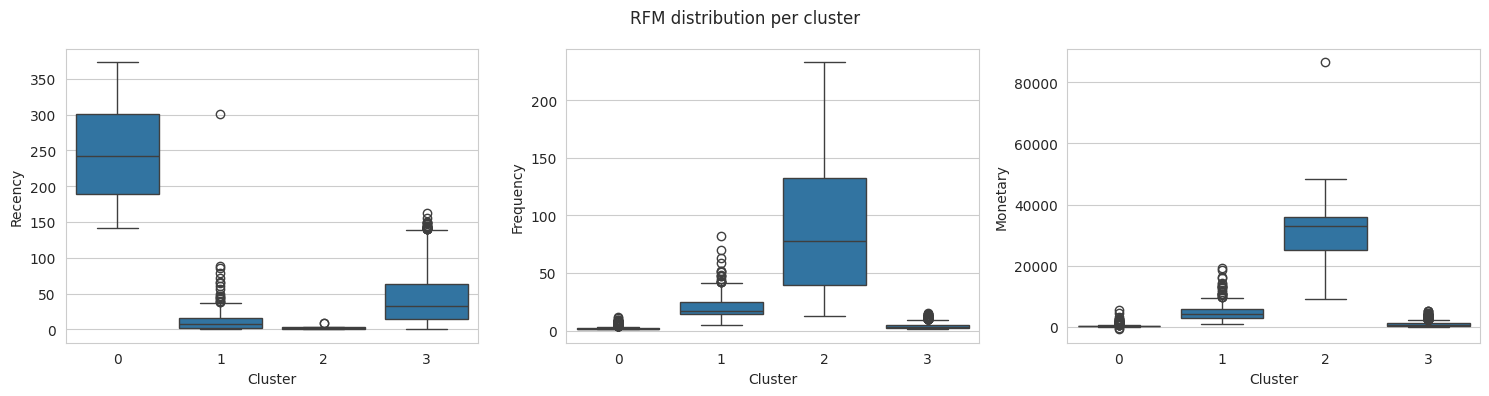

In [ ]:
figure = plt.figure(figsize = (15, 4))
figure.suptitle('RFM distribution per cluster')
figure.add_subplot(1, 3, 1)
sns.boxplot(rfm, x = 'Cluster', y = 'Recency', order = ['0', '1', '2', '3'])
figure.add_subplot(1, 3, 2)
sns.boxplot(rfm, x = 'Cluster', y = 'Frequency', order = ['0', '1', '2', '3'])
figure.add_subplot(1, 3, 3)
sns.boxplot(rfm, x = 'Cluster', y = 'Monetary', order = ['0', '1', '2', '3'])
plt.tight_layout()

In [ ]:
cluster_names = {
    '0': 'At Risk', # High Recency, Low Frequency, Low Monetary.
    '1': 'Loyal Customers', # Recency, Frequency, Monetary all decent.
    '2': 'Recent Big Buyers', # Low Recency, High Frequency, High Monetary.
    '3': 'New Customers', # Low/Medium Recency, Low Frequency, Low Monetary.
}

rfm['Cluster'].map(cluster_names).value_counts().reset_index().iplot(kind = 'pie', labels = 'Cluster', values = 'count',\
                                                                     title = 'Customer distribution per Cluster')

## 7. Supervised ML: Churn prediction.

#### 7.1 💡Dataset creation.

In [ ]:
df

InvoiceNo StockCode                          Description  Quantity  \
0         536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
1         536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
2         536365     22752         SET 7 BABUSHKA NESTING BOXES         2   
3         536365     21730    GLASS STAR FROSTED T-LIGHT HOLDER         6   
4         536366     22633               HAND WARMER UNION JACK         6   
...          ...       ...                                  ...       ...   
306187    581587     22629                   SPACEBOY LUNCH BOX        12   
306188    581587     22613          PACK OF 20 SPACEBOY NAPKINS        12   
306189    581587     22899          CHILDREN'S APRON DOLLY GIRL         6   
306190    581587     23255      CHILDRENS CUTLERY CIRCUS PARADE         4   
306191    581587     22138         BAKING SET 9 PIECE RETROSPOT         3   

          InvoiceTimestamp  UnitPrice CustomerID         Country  \
0      2010-12-01 08:26:00       3.39      17850  United Kingdom   
1      2010-12-01 08:26:00       3.39      17850  United Kingdom   
2      2010-12-01 08:26:00       7.65      17850  United Kingdom   
3      2010-12-01 08:26:00       4.25      17850  United Kingdom   
4      2010-12-01 08:28:00       1.85      17850  United Kingdom   
...                    ...        ...        ...             ...   
306187 2011-12-09 12:50:00       1.95      12680          France   
306188 2011-12-09 12:50:00       0.85      12680          France   
306189 2011-12-09 12:50:00       2.10      12680          France   
306190 2011-12-09 12:50:00       4.15      12680          France   
306191 2011-12-09 12:50:00       4.95      12680          France   

              Category            Sub-Category  TotalPrice InvoiceDate  
0       Home & Kitchen      Bedding & Cushions       20.34  2010-12-01  
1       Home & Kitchen      Bedding & Cushions       20.34  2010-12-01  
2       Home & Kitchen  Storage & Organization       15.30  2010-12-01  
3       Home & Kitchen                Lighting       25.50  2010-12-01  
4         Toys & Games     Outdoor Toys & Gear       11.10  2010-12-01  
...                ...                     ...         ...         ...  
306187  Home & Kitchen             Lunch Boxes       23.40  2011-12-09  
306188  Party Supplies               Tableware       10.20  2011-12-09  
306189  Home & Kitchen                    Kids       12.60  2011-12-09  
306190     Accessories               Tableware       16.60  2011-12-09  
306191  Home & Kitchen         Baking Supplies       14.85  2011-12-09  

[306192 rows x 12 columns]

In [ ]:
df['InvoiceDate'].min(), df['InvoiceDate'].max()

(datetime.date(2010, 12, 1), datetime.date(2011, 12, 9))

In [ ]:
min_reference_date = df['InvoiceDate'].min() + datetime.timedelta(days = 15)
min_reference_date

datetime.date(2010, 12, 16)

In [ ]:
max_reference_date = df['InvoiceDate'].max() - datetime.timedelta(days = 60)
max_reference_date

datetime.date(2011, 10, 10)

In [ ]:
np.random.seed(123)

# 30 random dates between the min and max reference date.
reference_dates = [min_reference_date + (max_reference_date - min_reference_date) * np.random.random() for _ in range(30)]
reference_dates

[datetime.date(2011, 7, 11),
 datetime.date(2011, 3, 11),
 datetime.date(2011, 2, 21),
 datetime.date(2011, 5, 29),
 datetime.date(2011, 7, 18),
 datetime.date(2011, 4, 21),
 datetime.date(2011, 10, 4),
 datetime.date(2011, 7, 8),
 datetime.date(2011, 5, 8),
 datetime.date(2011, 4, 11),
 datetime.date(2011, 3, 28),
 datetime.date(2011, 7, 21),
 datetime.date(2011, 4, 25),
 datetime.date(2011, 1, 2),
 datetime.date(2011, 4, 13),
 datetime.date(2011, 7, 23),
 datetime.date(2011, 2, 8),
 datetime.date(2011, 2, 6),
 datetime.date(2011, 5, 23),
 datetime.date(2011, 5, 23),
 datetime.date(2011, 6, 23),
 datetime.date(2011, 8, 26),
 datetime.date(2011, 7, 19),
 datetime.date(2011, 6, 16),
 datetime.date(2011, 7, 19),
 datetime.date(2011, 3, 22),
 datetime.date(2011, 4, 2),
 datetime.date(2011, 2, 22),
 datetime.date(2011, 3, 13),
 datetime.date(2011, 6, 22)]

In [ ]:
rfm_churn = []

for reference_date in reference_dates:
  _rfm = df[df['InvoiceDate'] <= reference_date].groupby('CustomerID').agg(
      Recency = ('InvoiceDate', lambda s: (reference_date - s.max()).days),
      Frequency = ('InvoiceNo', 'nunique'),
      Monetary = ('TotalPrice', 'sum'))

  _max_reference_date = reference_date + datetime.timedelta(days = 60)

  churn = pd.Series(index = _rfm.index, data = 1, name = 'Churn')
  returning_customers = set(df[(df['InvoiceDate'] > reference_date) & (df['InvoiceDate'] <= _max_reference_date)]['CustomerID'])
  churn.loc[list(set(churn.index).intersection(returning_customers))] = 0

  _rfm = pd.concat([
      _rfm,
      churn
  ], axis = 1)
  _rfm['Year'] = reference_date.year
  _rfm['Month'] = reference_date.month

  rfm_churn.append(_rfm)

rfm_churn

[            Recency  Frequency  Monetary  Churn  Year  Month
 CustomerID                                                  
 12347            32          4   1616.30      0  2011      7
 12348            97          3    117.80      1  2011      7
 12350           159          1    264.40      1  2011      7
 12352           111          5    403.28      1  2011      7
 12353            53          1     89.00      1  2011      7
 ...             ...        ...       ...    ...   ...    ...
 18273           106          1     51.00      0  2011      7
 18280           126          1    165.30      1  2011      7
 18281            29          1     15.12      1  2011      7
 18283            18          7    624.18      0  2011      7
 18287            50          1    719.68      1  2011      7
 
 [2956 rows x 6 columns],
             Recency  Frequency  Monetary  Churn  Year  Month
 CustomerID                                                  
 12347            44          2    934.04 

In [ ]:
rfm_churn = pd.concat(rfm_churn, axis = 0, ignore_index = True)
rfm_churn

Recency  Frequency  Monetary  Churn  Year  Month
0           32          4   1616.30      0  2011      7
1           97          3    117.80      1  2011      7
2          159          1    264.40      1  2011      7
3          111          5    403.28      1  2011      7
4           53          1     89.00      1  2011      7
...        ...        ...       ...    ...   ...    ...
72759       87          1     51.00      1  2011      6
72760      107          1    165.30      1  2011      6
72761       10          1     15.12      1  2011      6
72762        8          6    473.36      0  2011      6
72763       31          1    719.68      1  2011      6

[72764 rows x 6 columns]

#### 7.2. 💡EDA and Feature Engineering.

In [ ]:
rfm_churn['Churn'].value_counts().reset_index().iplot(kind = 'pie', labels = 'Churn', values = 'count', title = 'Target variable distribution')

In [ ]:
rfm_churn['Churn'] = rfm_churn['Churn'].astype(str)
rfm_churn

Recency  Frequency  Monetary Churn  Year  Month
0           32          4   1616.30     0  2011      7
1           97          3    117.80     1  2011      7
2          159          1    264.40     1  2011      7
3          111          5    403.28     1  2011      7
4           53          1     89.00     1  2011      7
...        ...        ...       ...   ...   ...    ...
72759       87          1     51.00     1  2011      6
72760      107          1    165.30     1  2011      6
72761       10          1     15.12     1  2011      6
72762        8          6    473.36     0  2011      6
72763       31          1    719.68     1  2011      6

[72764 rows x 6 columns]

In [ ]:
px.scatter(rfm_churn, x = 'Recency', y = 'Monetary', size = 'Frequency', color = 'Churn').show()

In [ ]:
px.scatter_3d(rfm_churn, x = 'Recency', y = 'Frequency', z = 'Monetary', color = 'Churn').show()

In [ ]:
rfm_churn['Year'].value_counts()

Year
2011    72764
Name: count, dtype: int64

In [ ]:
rfm_churn['Month'].value_counts()

Month
7     20971
4     11361
5     10392
6      8544
3      7767
2      5997
10     3577
8      3243
1       912
Name: count, dtype: int64

In [ ]:
rfm_churn['Quarter'] = rfm_churn['Month'].apply(lambda month: math.ceil(month / 3))
rfm_churn[['Month', 'Quarter']].drop_duplicates().sort_values('Month')

Month  Quarter
33097      1        1
4811       2        1
2956       3        1
12043      4        2
6381       5        2
47404      6        2
0          7        3
50275      8        3
14411     10        4

In [ ]:
rfm_churn.drop(['Year', 'Month'], axis = 1, inplace = True)
rfm_churn

Recency  Frequency  Monetary Churn  Quarter
0           32          4   1616.30     0        3
1           97          3    117.80     1        3
2          159          1    264.40     1        3
3          111          5    403.28     1        3
4           53          1     89.00     1        3
...        ...        ...       ...   ...      ...
72759       87          1     51.00     1        2
72760      107          1    165.30     1        2
72761       10          1     15.12     1        2
72762        8          6    473.36     0        2
72763       31          1    719.68     1        2

[72764 rows x 5 columns]

#### 7.3. Train test split.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(rfm_churn.drop('Churn', axis = 1), rfm_churn['Churn'], test_size = .3, random_state = 123)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((50934, 4), (50934,), (21830, 4), (21830,))

In [ ]:
X_train_sample = X_train.sample(frac = .2, replace = False, random_state = 123)
X_train_sample

Recency  Frequency  Monetary  Quarter
40304       27          2     -5.10        1
9021         4          6   1607.01        2
66309       12          3    100.80        2
4952        73          1    166.70        1
2710         8          2    159.37        3
...        ...        ...       ...      ...
63384       19          1    124.10        1
36554      128          3    141.09        3
41096       54          1    411.40        1
55023       12          6   1035.59        3
4853         7          6    296.60        1

[10187 rows x 4 columns]

In [ ]:
y_train_sample = y_train[X_train_sample.index]
y_train_sample

40304    1
9021     0
66309    0
4952     1
2710     1
        ..
63384    1
36554    1
41096    1
55023    0
4853     0
Name: Churn, Length: 10187, dtype: object

In [ ]:
y_train_sample.value_counts().reset_index().iplot(kind = 'pie', labels = 'Churn', values = 'count', title = 'Target variable distribution')

#### 7.4. Random Forest Classifier.

##### CV and Training.

In [ ]:
param_grid1 = {
    'n_estimators': np.arange(50, 251, 50),
    'min_samples_split': [2, 4, 5],
    'min_samples_leaf': [1, 2, 3]
}

grid1 = GridSearchCV(RandomForestClassifier(), param_grid1, cv = 3, refit = False, verbose = 2)
grid1

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid={'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 4, 5],
                         'n_estimators': array([ 50, 100, 150, 200, 250])},
             refit=False, verbose=2)

In [ ]:
grid1.fit(X_train_sample, y_train_sample)

Fitting 3 folds for each of 45 candidates, totalling 135 fits
[CV] END min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.7s
[CV] END min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.6s
[CV] END min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.6s
[CV] END min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   1.2s
[CV] END min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   1.3s
[CV] END min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   1.7s
[CV] END min_samples_leaf=1, min_samples_split=2, n_estimators=150; total time=   2.7s
[CV] END min_samples_leaf=1, min_samples_split=2, n_estimators=150; total time=   1.8s
[CV] END min_samples_leaf=1, min_samples_split=2, n_estimators=150; total time=   1.8s
[CV] END min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   2.8s
[CV] END min_samples_leaf=1, min_samples_split=2, n_estimators=200; tot

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid={'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 4, 5],
                         'n_estimators': array([ 50, 100, 150, 200, 250])},
             refit=False, verbose=2)

In [ ]:
grid1.best_params_, grid1.best_score_

({'min_samples_leaf': 2, 'min_samples_split': 4, 'n_estimators': 50},
 0.715716026189233)

In [ ]:
rfc = RandomForestClassifier(n_estimators = grid1.best_params_['n_estimators'], min_samples_split = grid1.best_params_['min_samples_split'],
                             min_samples_leaf = grid1.best_params_['min_samples_leaf'], random_state = 123)
rfc

RandomForestClassifier(min_samples_leaf=2, min_samples_split=4, n_estimators=50,
                       random_state=123)

In [ ]:
rfc.fit(X_train, y_train)

RandomForestClassifier(min_samples_leaf=2, min_samples_split=4, n_estimators=50,
                       random_state=123)

##### Inference.

In [ ]:
y_predicted_rf = rfc.predict(X_test)
y_predicted_rf

array(['0', '0', '1', ..., '0', '1', '1'], dtype=object)

##### Evaluation.

In [ ]:
print(f'Score on the training data: {rfc.score(X_train, y_train)}\nScore on the testing data: {rfc.score(X_test, y_test)}')

Score on the training data: 0.9628735225978717
Score on the testing data: 0.8031149793861658


In [ ]:
print(confusion_matrix(y_test, y_predicted_rf), '\n\n', classification_report(y_test, y_predicted_rf))

[[ 6736  2635]
 [ 1663 10796]] 

               precision    recall  f1-score   support

           0       0.80      0.72      0.76      9371
           1       0.80      0.87      0.83     12459

    accuracy                           0.80     21830
   macro avg       0.80      0.79      0.80     21830
weighted avg       0.80      0.80      0.80     21830



#### 7.5. Support Vector Classifier.

##### RBF/Gaussian kernel.

###### CV and Training.

In [ ]:
# Feature Scaling.

scaler = StandardScaler()
X_train_sample_scaled = scaler.fit_transform(X_train_sample)
X_train_sample_scaled

array([[-0.62621349, -0.22470667, -0.50027378, -1.50048563],
       [-1.0198583 ,  0.69101965,  0.74935909, -0.27460969],
       [-0.88293837,  0.00422491, -0.41818501, -0.27460969],
       ...,
       [-0.1641087 , -0.45363826, -0.1774223 , -1.50048563],
       [-0.88293837,  0.69101965,  0.30642082,  0.95126625],
       [-0.96851333,  0.69101965, -0.26640994, -1.50048563]])

In [ ]:
X_train_sample_scaled.mean(), X_train_sample_scaled.std()

(-3.7316222993192656e-17, 1.0)

In [ ]:
param_grid2 = {
    'C': [0.1, 1, 10, 50],
    'gamma': [0.001, 0.01, 0.1, 0.5]
}

grid2 = GridSearchCV(SVC(), param_grid = param_grid2, cv = 3, refit = False, verbose = 2)
grid2

GridSearchCV(cv=3, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 50],
                         'gamma': [0.001, 0.01, 0.1, 0.5]},
             refit=False, verbose=2)

In [ ]:
grid2.fit(X_train_sample_scaled, y_train_sample)

Fitting 3 folds for each of 16 candidates, totalling 48 fits
[CV] END .................................C=0.1, gamma=0.001; total time=   4.4s
[CV] END .................................C=0.1, gamma=0.001; total time=   5.4s
[CV] END .................................C=0.1, gamma=0.001; total time=   3.8s
[CV] END ..................................C=0.1, gamma=0.01; total time=   2.5s
[CV] END ..................................C=0.1, gamma=0.01; total time=   2.4s
[CV] END ..................................C=0.1, gamma=0.01; total time=   2.5s
[CV] END ...................................C=0.1, gamma=0.1; total time=   3.8s
[CV] END ...................................C=0.1, gamma=0.1; total time=   3.0s
[CV] END ...................................C=0.1, gamma=0.1; total time=   2.4s
[CV] END ...................................C=0.1, gamma=0.5; total time=   2.7s
[CV] END ...................................C=0.1, gamma=0.5; total time=   2.5s
[CV] END ...................................C=0.

GridSearchCV(cv=3, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 50],
                         'gamma': [0.001, 0.01, 0.1, 0.5]},
             refit=False, verbose=2)

In [ ]:
grid2.best_params_, grid2.best_score_

({'C': 1, 'gamma': 0.5}, 0.705015632471827)

In [ ]:
svc = SVC(C = grid2.best_params_['C'], gamma = grid2.best_params_['gamma'])
svc

SVC(C=1, gamma=0.5)

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_train_scaled

array([[-0.87385411, -0.43414533, -0.22538218, -0.27926388],
       [-0.53033441, -0.21842373, -0.22372809, -1.49385071],
       [ 2.73310269, -0.43414533, -0.40895346,  0.93532295],
       ...,
       [ 1.53078376,  0.21301947, -0.4177104 ,  2.14990978],
       [ 1.75407156, -0.43414533, -0.46206265,  0.93532295],
       [-0.95973403,  0.86018426,  0.63300818,  2.14990978]])

In [ ]:
svc.fit(X_train_scaled, y_train)

SVC(C=1, gamma=0.5)

###### Inference.

In [ ]:
X_test_scaled = scaler.transform(X_test)
X_test_scaled

In [ ]:
y_predicted_svc = svc.predict(X_test_scaled)
y_predicted_svc

###### Evaluation.

In [ ]:
print(f'Score on the training data: {svc.score(X_train_scaled, y_train)}\nScore on the testing data: {svc.score(X_test_scaled, y_test)}')

Score on the training data: 0.7045195743511211
Score on the testing data: 0.7042601923957856


In [ ]:
print(confusion_matrix(y_test, y_predicted_svc), '\n\n', classification_report(y_test, y_predicted_svc))

[[ 4664  4707]
 [ 1749 10710]] 

               precision    recall  f1-score   support

           0       0.73      0.50      0.59      9371
           1       0.69      0.86      0.77     12459

    accuracy                           0.70     21830
   macro avg       0.71      0.68      0.68     21830
weighted avg       0.71      0.70      0.69     21830



##### Linear SVC.

###### CV and Training.

In [ ]:
param_grid3 = {
    'C': [0.01, 0.1, 1, 10, 50],
}

grid3 = GridSearchCV(LinearSVC(), param_grid = param_grid3, cv = 5, refit = True, verbose = 2)
grid3

GridSearchCV(cv=5, estimator=LinearSVC(),
             param_grid={'C': [0.01, 0.1, 1, 10, 50]}, verbose=2)

In [ ]:
grid3.fit(X_train_scaled[:, :-1], y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV] END .............................................C=0.01; total time=   0.2s
[CV] END .............................................C=0.01; total time=   0.2s
[CV] END .............................................C=0.01; total time=   0.2s
[CV] END .............................................C=0.01; total time=   0.2s
[CV] END .............................................C=0.01; total time=   0.2s
[CV] END ..............................................C=0.1; total time=   0.2s
[CV] END ..............................................C=0.1; total time=   0.2s
[CV] END ..............................................C=0.1; total time=   0.2s
[CV] END ..............................................C=0.1; total time=   0.2s
[CV] END ..............................................C=0.1; total time=   0.2s
[CV] END ................................................C=1; total time=   0.2s
[CV] END ........................................

GridSearchCV(cv=5, estimator=LinearSVC(),
             param_grid={'C': [0.01, 0.1, 1, 10, 50]}, verbose=2)

In [ ]:
grid3.best_params_, grid3.best_score_

({'C': 0.01}, 0.6902855402327159)

In [ ]:
grid3.best_estimator_

LinearSVC(C=0.01)

###### 💡Decision Boundary.

In [ ]:
# Hyperplane parameters.

a, b, c = grid3.best_estimator_.coef_[0]
d = grid3.best_estimator_.intercept_[0]
a, b, c, d

(0.16025683155044684,
 -0.38834428826332196,
 -0.23804914820723472,
 0.10563551629562241)

In [ ]:
recency_range = np.linspace(X_train['Recency'].min(), X_train['Recency'].max(), 50)
frequency_range = np.linspace(X_train['Frequency'].min(), X_train['Frequency'].max(), 50)

In [ ]:
x, y = np.meshgrid(recency_range, frequency_range)
x, y

(array([[  0.        ,   6.26530612,  12.53061224, ..., 294.46938776,
         300.73469388, 307.        ],
        [  0.        ,   6.26530612,  12.53061224, ..., 294.46938776,
         300.73469388, 307.        ],
        [  0.        ,   6.26530612,  12.53061224, ..., 294.46938776,
         300.73469388, 307.        ],
        ...,
        [  0.        ,   6.26530612,  12.53061224, ..., 294.46938776,
         300.73469388, 307.        ],
        [  0.        ,   6.26530612,  12.53061224, ..., 294.46938776,
         300.73469388, 307.        ],
        [  0.        ,   6.26530612,  12.53061224, ..., 294.46938776,
         300.73469388, 307.        ]]),
 array([[  1.        ,   1.        ,   1.        , ...,   1.        ,
           1.        ,   1.        ],
        [  4.18367347,   4.18367347,   4.18367347, ...,   4.18367347,
           4.18367347,   4.18367347],
        [  7.36734694,   7.36734694,   7.36734694, ...,   7.36734694,
           7.36734694,   7.36734694],
        ...,


In [ ]:
# Hyperplane: ax + by + cz + d = 0 (Decision Boundary).

z = -(a*x + b*y + d) / c
z

array([[  -1.18760674,    3.0302538 ,    7.24811434, ...,  197.05183846,
         201.269699  ,  205.48755953],
       [  -6.38133004,   -2.1634695 ,    2.05439104, ...,  191.85811516,
         196.0759757 ,  200.29383623],
       [ -11.57505334,   -7.3571928 ,   -3.13933226, ...,  186.66439186,
         190.8822524 ,  195.10011293],
       ...,
       [-245.29260183, -241.07474129, -236.85688075, ...,  -47.05315663,
         -42.83529609,  -38.61743556],
       [-250.48632512, -246.26846459, -242.05060405, ...,  -52.24687993,
         -48.02901939,  -43.81115886],
       [-255.68004842, -251.46218789, -247.24432735, ...,  -57.44060323,
         -53.22274269,  -49.00488216]])

In [ ]:
figure = px.scatter_3d(X_train, x = 'Recency', y = 'Frequency', z = 'Monetary', color = y_train)
figure.add_scatter3d(x = x.flatten(), y = y.flatten(), z = z.flatten(), mode = 'markers', name = 'Decision Boundary', opacity = .5)
figure.show()

###### Inference.

In [ ]:
y_predicted_svc_linear = grid3.best_estimator_.predict(X_test_scaled[:, :-1])
y_predicted_svc_linear

array(['1', '1', '1', ..., '1', '1', '1'], dtype=object)

###### Evaluation.

In [ ]:
print(f'Score on the training data: {grid3.best_estimator_.score(X_train_scaled[:, :-1], y_train)}\nScore on the testing data: {grid3.best_estimator_.score(X_test_scaled[:, :-1], y_test)}')

Score on the training data: 0.6898535359484823
Score on the testing data: 0.6916628492899679


In [ ]:
print(confusion_matrix(y_test, y_predicted_svc_linear), '\n\n', classification_report(y_test, y_predicted_svc_linear))

[[ 4103  5268]
 [ 1463 10996]] 

               precision    recall  f1-score   support

           0       0.74      0.44      0.55      9371
           1       0.68      0.88      0.77     12459

    accuracy                           0.69     21830
   macro avg       0.71      0.66      0.66     21830
weighted avg       0.70      0.69      0.67     21830

